# Using Deep Learning to Quantify Fibrosis in Muscle Tissue
## Report Generation
## By Sergei Issaev

### EDIT HERE

In [9]:
model_number = '087'
date = 'aug18ep150'
patch=True
description = '''
cut it
'''
date_of_run = ["6/30/2021"]
inv_data_gen_args = dict()

# samplewise_std_normalization=True, samplewise_center=True

### END OF EDIT HERE

### Set Constants

In [10]:
#train_file = '/home/sergei/projects/def-rogertam/sergei/micro_scans/data/traintest/diaphragmsmarinefascia4/test_liver_only.npz'
train_file = '/home/sergei/projects/def-rogertam/sergei/micro_scans/data/total_test_final.npz'
test_file = '/home/sergei/projects/def-rogertam/sergei/micro_scans/data/traintest/diaphragmsmarinefascia4/test_liver_only.npz'
model_run = '/home/sergei/projects/def-rogertam/sergei/micro_scans/models/' + date + '/model_' + model_number + '000.h5'

### Import Libraries

In [11]:
%%time
from datetime import date
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint

CPU times: user 55 µs, sys: 25 µs, total: 80 µs
Wall time: 88.5 µs


In [12]:
%%time
import cv2  
import sys
sys.path.insert(1, '/project/def-rogertam/sergei/micro_scans/code_files/product')
import threshold_fx
import random
import matplotlib.pyplot as plt
import numpy as np  
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.spatial import distance
from skimage.metrics import (adapted_rand_error, variation_of_information)
from skimage import measure
import math
import statistics
from tqdm import tqdm
import pandas as pd
import datetime

CPU times: user 127 µs, sys: 0 ns, total: 127 µs
Wall time: 136 µs


### Initialize arrays

In [13]:
print('load and prepare training images')
def load_real_samples(filename):
    # load compressed ararys
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

invariant_datagen = ImageDataGenerator(**inv_data_gen_args)
dataset = load_real_samples(train_file)
print('Loaded', dataset[0].shape, dataset[1].shape)
trainA, trainB = dataset
invariant_datagen.fit(trainA, augment=True)


data = load(train_file)
[A1, A2] = data['arr_0'], data['arr_1'] 
X1 = (A1 - 127.5) / 127.5
X2 = (A2 - 127.5) / 127.5
print('Loaded', X1.shape)

samples = X1.shape[0]


load and prepare training images
Loaded (3329, 256, 256, 3) (3329, 256, 256, 3)
Loaded (3329, 256, 256, 3)


In [14]:
l1 = []
l2 = []
corrs = []
stds = []
EDs = []
eustds = []
mses = []
mmsis = []
precision_list = []
recall_list = []
split_list = []
merge_list = []
error_list = []
pix_acc_list = []
iou_list = []
dice_list = []
curve_tar = []
curve_gen = []
pcc_sp = np.zeros((samples,1), dtype='float32')
ED = np.zeros((samples,1), dtype='float32')
dst = np.zeros((samples,1), dtype='float32')

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

  0%|          | 0/3329 [00:00<?, ?it/s]

The amount of white pixels in the source image is 37035


/project/6003019/sergei/test2/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


  0%|          | 1/3329 [00:09<8:22:39,  9.06s/it]

The amount of white pixels in the source image is 60196


  0%|          | 2/3329 [00:12<5:03:12,  5.47s/it]

The amount of white pixels in the source image is 0


/project/6003019/sergei/test2/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide
/project/6003019/sergei/test2/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide
/project/6003019/sergei/test2/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


  0%|          | 3/3329 [00:18<5:35:50,  6.06s/it]

The amount of white pixels in the source image is 64866


  0%|          | 4/3329 [00:21<4:21:19,  4.72s/it]

The amount of white pixels in the source image is 65127


  0%|          | 5/3329 [00:24<3:46:07,  4.08s/it]

The amount of white pixels in the source image is 0


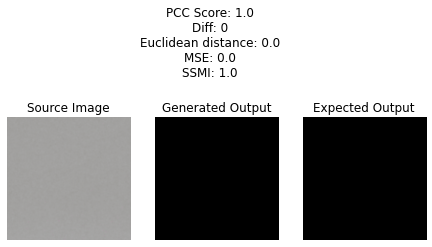

  0%|          | 6/3329 [00:31<4:44:30,  5.14s/it]

The amount of white pixels in the source image is 64051


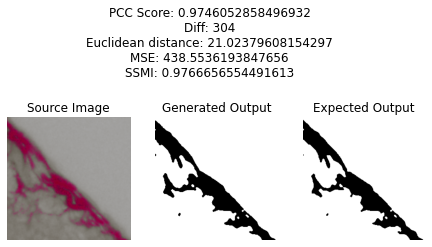

  0%|          | 7/3329 [00:34<4:05:07,  4.43s/it]

The amount of white pixels in the source image is 65233


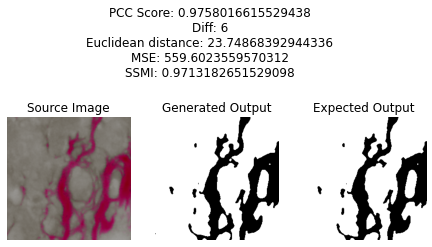

  0%|          | 8/3329 [00:37<3:39:37,  3.97s/it]

The amount of white pixels in the source image is 64822


  0%|          | 9/3329 [00:40<3:19:27,  3.60s/it]

The amount of white pixels in the source image is 26476


  0%|          | 10/3329 [00:43<3:10:33,  3.44s/it]

The amount of white pixels in the source image is 64635


  0%|          | 11/3329 [00:46<3:07:24,  3.39s/it]

The amount of white pixels in the source image is 63133


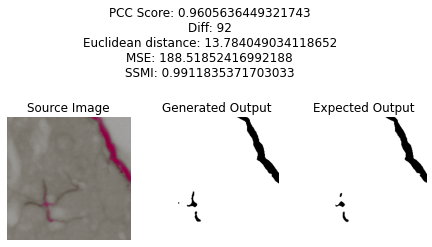

  0%|          | 12/3329 [00:49<2:58:51,  3.24s/it]

The amount of white pixels in the source image is 65230


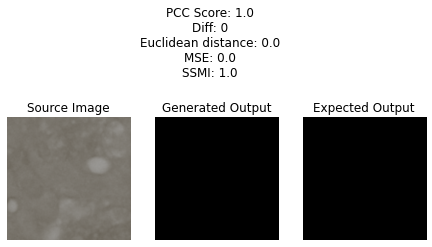

  0%|          | 13/3329 [00:56<4:04:26,  4.42s/it]

The amount of white pixels in the source image is 65330


  0%|          | 14/3329 [01:04<4:52:33,  5.30s/it]

The amount of white pixels in the source image is 65514


  0%|          | 15/3329 [01:11<5:27:14,  5.92s/it]

The amount of white pixels in the source image is 65015


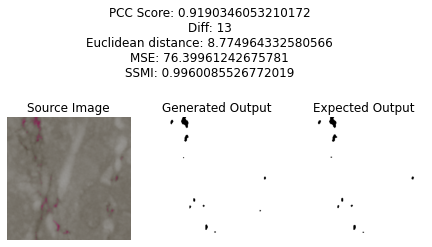

  0%|          | 16/3329 [01:14<4:38:18,  5.04s/it]

The amount of white pixels in the source image is 65327


  1%|          | 17/3329 [01:17<3:59:56,  4.35s/it]

The amount of white pixels in the source image is 63908


  1%|          | 18/3329 [01:20<3:37:25,  3.94s/it]

The amount of white pixels in the source image is 0


  1%|          | 19/3329 [01:26<4:17:17,  4.66s/it]

The amount of white pixels in the source image is 65252


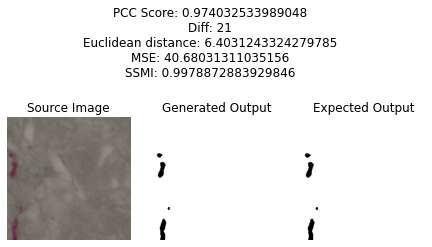

  1%|          | 20/3329 [01:29<3:54:47,  4.26s/it]

The amount of white pixels in the source image is 0


  1%|          | 21/3329 [01:36<4:30:56,  4.91s/it]

The amount of white pixels in the source image is 65292


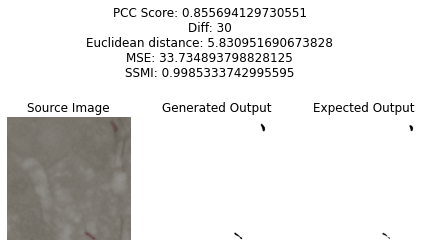

  1%|          | 22/3329 [01:39<3:57:22,  4.31s/it]

The amount of white pixels in the source image is 65332


  1%|          | 23/3329 [01:46<4:45:30,  5.18s/it]

The amount of white pixels in the source image is 64425


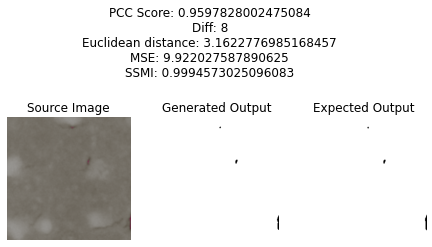

  1%|          | 24/3329 [01:49<4:09:56,  4.54s/it]

The amount of white pixels in the source image is 65514


  1%|          | 25/3329 [01:56<4:59:58,  5.45s/it]

The amount of white pixels in the source image is 65341


  1%|          | 26/3329 [02:03<5:10:48,  5.65s/it]

The amount of white pixels in the source image is 65271


  1%|          | 27/3329 [02:11<5:50:27,  6.37s/it]

The amount of white pixels in the source image is 65483


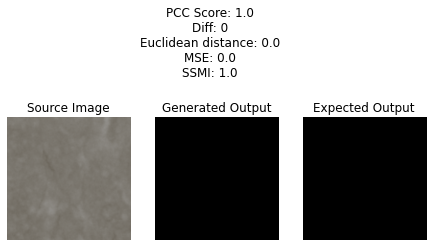

  1%|          | 28/3329 [02:18<6:02:32,  6.59s/it]

The amount of white pixels in the source image is 65433


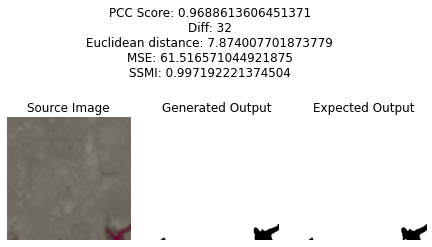

  1%|          | 29/3329 [02:21<5:03:06,  5.51s/it]

The amount of white pixels in the source image is 65109


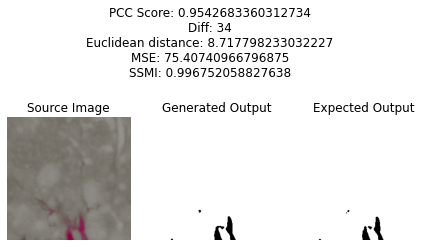

  1%|          | 30/3329 [02:24<4:19:41,  4.72s/it]

The amount of white pixels in the source image is 65388


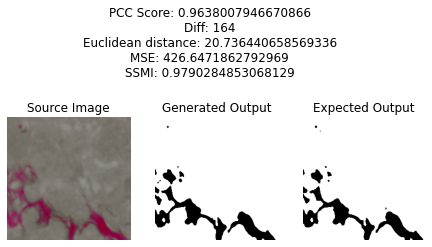

  1%|          | 31/3329 [02:27<3:50:24,  4.19s/it]

The amount of white pixels in the source image is 59740


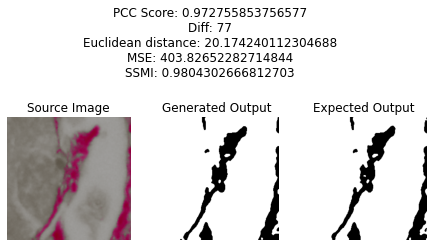

  1%|          | 32/3329 [02:29<3:28:56,  3.80s/it]

The amount of white pixels in the source image is 60698


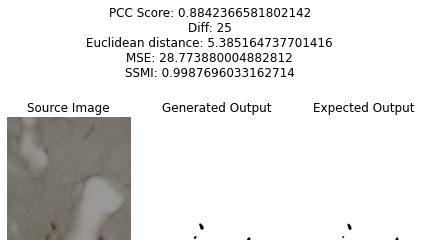

  1%|          | 33/3329 [02:32<3:12:37,  3.51s/it]

The amount of white pixels in the source image is 64343


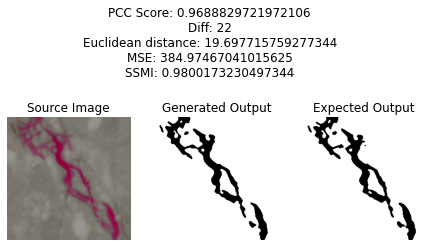

  1%|          | 34/3329 [02:35<3:07:58,  3.42s/it]

The amount of white pixels in the source image is 65175


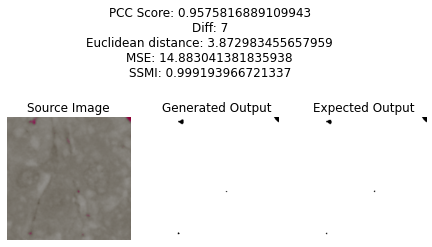

  1%|          | 35/3329 [02:39<3:08:47,  3.44s/it]

The amount of white pixels in the source image is 64420


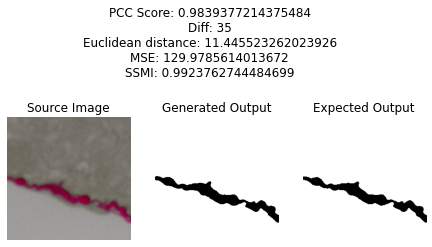

  1%|          | 36/3329 [02:42<3:00:04,  3.28s/it]

The amount of white pixels in the source image is 63546


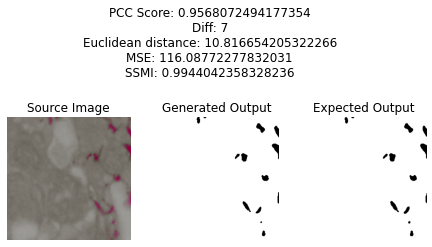

  1%|          | 37/3329 [02:45<2:53:07,  3.16s/it]

The amount of white pixels in the source image is 0


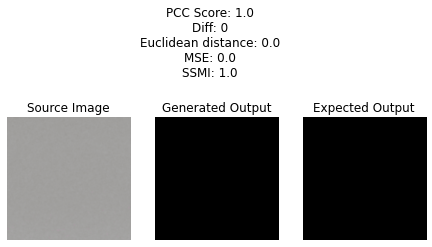

  1%|          | 38/3329 [02:51<3:50:25,  4.20s/it]

The amount of white pixels in the source image is 65330


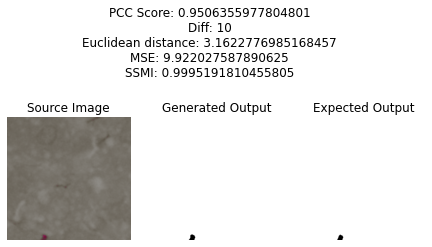

  1%|          | 39/3329 [02:54<3:29:01,  3.81s/it]

The amount of white pixels in the source image is 62893


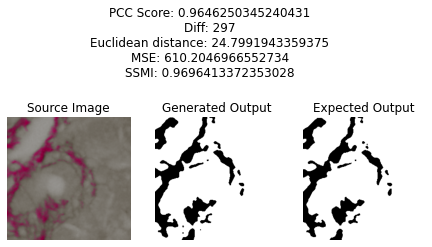

  1%|          | 40/3329 [02:57<3:16:59,  3.59s/it]

The amount of white pixels in the source image is 64966


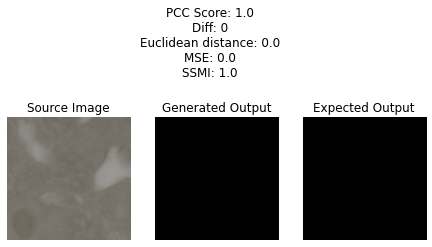

  1%|          | 41/3329 [03:05<4:15:24,  4.66s/it]

The amount of white pixels in the source image is 64913


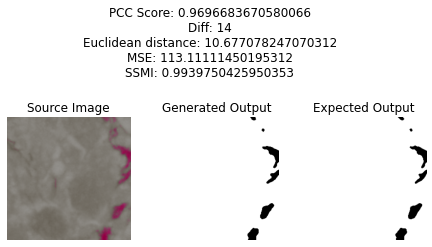

  1%|▏         | 42/3329 [03:07<3:47:07,  4.15s/it]

The amount of white pixels in the source image is 65459


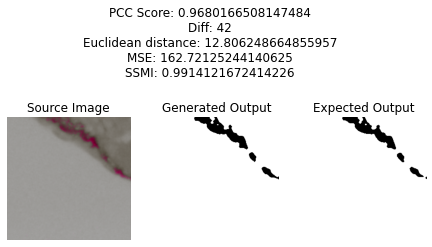

  1%|▏         | 43/3329 [03:10<3:26:58,  3.78s/it]

The amount of white pixels in the source image is 65096


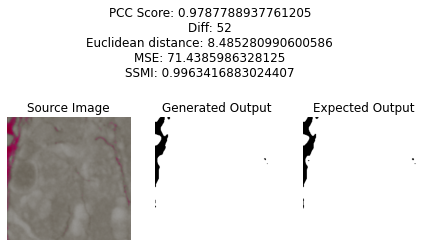

  1%|▏         | 44/3329 [03:17<4:09:47,  4.56s/it]

The amount of white pixels in the source image is 63708


  1%|▏         | 45/3329 [03:19<3:39:00,  4.00s/it]

The amount of white pixels in the source image is 65322


  1%|▏         | 46/3329 [03:22<3:20:28,  3.66s/it]

The amount of white pixels in the source image is 64611


  1%|▏         | 47/3329 [03:25<3:08:45,  3.45s/it]

The amount of white pixels in the source image is 65370


  1%|▏         | 48/3329 [03:33<4:15:32,  4.67s/it]

The amount of white pixels in the source image is 64762


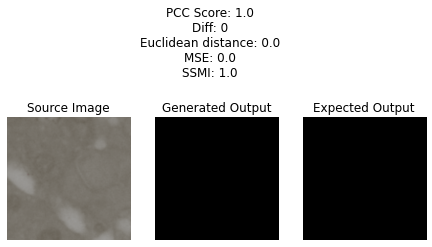

  1%|▏         | 49/3329 [03:40<4:59:20,  5.48s/it]

The amount of white pixels in the source image is 0


  2%|▏         | 50/3329 [03:46<5:12:00,  5.71s/it]

The amount of white pixels in the source image is 64708


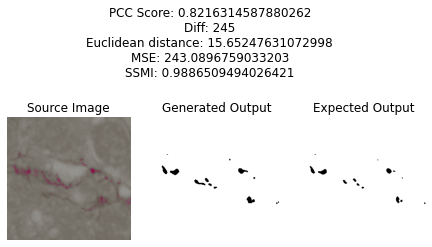

  2%|▏         | 51/3329 [03:50<4:29:05,  4.93s/it]

The amount of white pixels in the source image is 65502


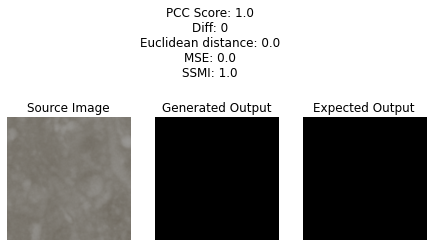

  2%|▏         | 52/3329 [03:57<5:12:28,  5.72s/it]

The amount of white pixels in the source image is 64984


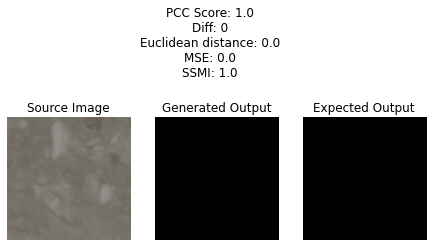

  2%|▏         | 53/3329 [04:05<5:46:01,  6.34s/it]

The amount of white pixels in the source image is 65488


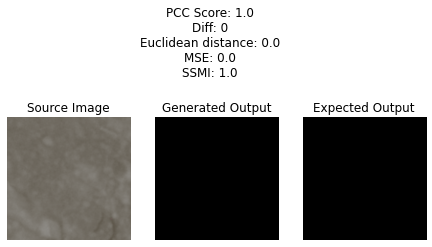

  2%|▏         | 54/3329 [04:13<6:20:29,  6.97s/it]

The amount of white pixels in the source image is 65343


  2%|▏         | 55/3329 [04:16<5:10:15,  5.69s/it]

The amount of white pixels in the source image is 64524


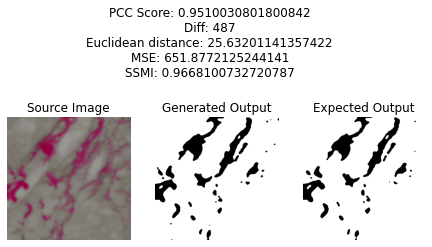

  2%|▏         | 56/3329 [04:19<4:25:51,  4.87s/it]

The amount of white pixels in the source image is 65096


  2%|▏         | 57/3329 [04:27<5:09:25,  5.67s/it]

The amount of white pixels in the source image is 65399


  2%|▏         | 58/3329 [04:34<5:38:36,  6.21s/it]

The amount of white pixels in the source image is 64784


  2%|▏         | 59/3329 [04:38<5:02:22,  5.55s/it]

The amount of white pixels in the source image is 65384


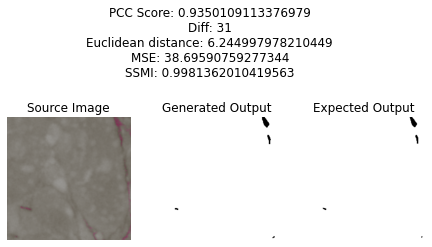

  2%|▏         | 60/3329 [04:41<4:27:47,  4.92s/it]

The amount of white pixels in the source image is 65323


  2%|▏         | 61/3329 [04:44<3:55:36,  4.33s/it]

The amount of white pixels in the source image is 64359


  2%|▏         | 62/3329 [04:47<3:32:52,  3.91s/it]

The amount of white pixels in the source image is 65269


/project/6003019/sergei/test2/lib/python3.7/site-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


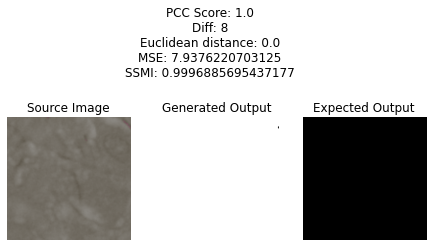

  2%|▏         | 63/3329 [04:52<3:47:02,  4.17s/it]

The amount of white pixels in the source image is 60684


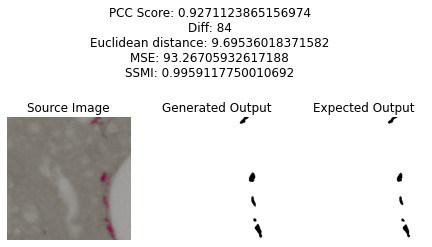

  2%|▏         | 64/3329 [04:58<4:18:50,  4.76s/it]

The amount of white pixels in the source image is 65103


  2%|▏         | 65/3329 [05:01<3:48:15,  4.20s/it]

The amount of white pixels in the source image is 65110


  2%|▏         | 66/3329 [05:04<3:28:47,  3.84s/it]

The amount of white pixels in the source image is 64929


  2%|▏         | 67/3329 [05:08<3:24:11,  3.76s/it]

The amount of white pixels in the source image is 65434


  2%|▏         | 68/3329 [05:16<4:34:40,  5.05s/it]

The amount of white pixels in the source image is 65095


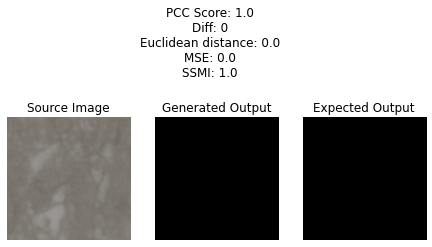

  2%|▏         | 69/3329 [05:23<5:10:39,  5.72s/it]

The amount of white pixels in the source image is 65302


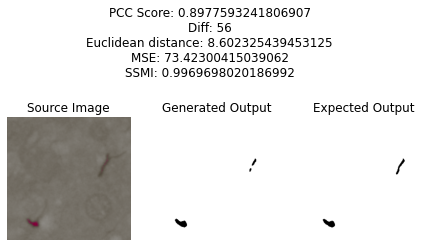

  2%|▏         | 70/3329 [05:29<5:09:50,  5.70s/it]

The amount of white pixels in the source image is 65370


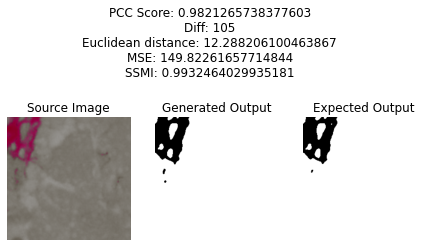

  2%|▏         | 71/3329 [05:32<4:36:22,  5.09s/it]

The amount of white pixels in the source image is 65216


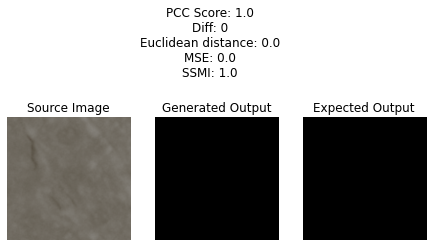

  2%|▏         | 72/3329 [05:40<5:12:37,  5.76s/it]

The amount of white pixels in the source image is 65454


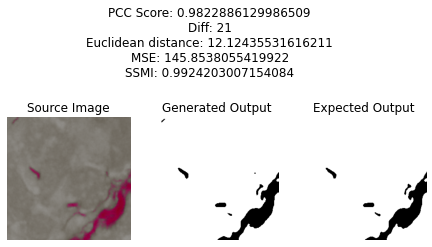

  2%|▏         | 73/3329 [05:44<4:42:22,  5.20s/it]

The amount of white pixels in the source image is 65295


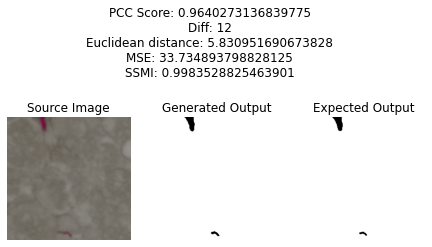

  2%|▏         | 74/3329 [05:47<4:07:55,  4.57s/it]

The amount of white pixels in the source image is 57879


  2%|▏         | 75/3329 [05:49<3:37:12,  4.01s/it]

The amount of white pixels in the source image is 0


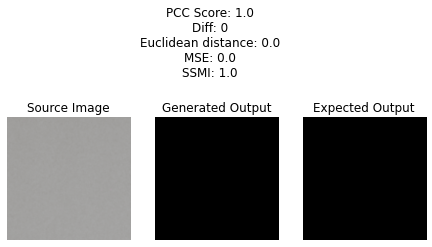

  2%|▏         | 76/3329 [05:56<4:19:21,  4.78s/it]

The amount of white pixels in the source image is 61111


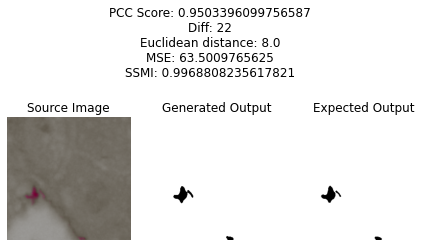

  2%|▏         | 77/3329 [05:59<3:50:33,  4.25s/it]

The amount of white pixels in the source image is 65072


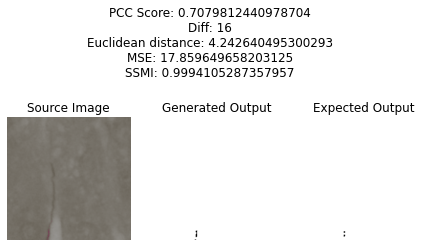

  2%|▏         | 78/3329 [06:02<3:30:02,  3.88s/it]

The amount of white pixels in the source image is 65296


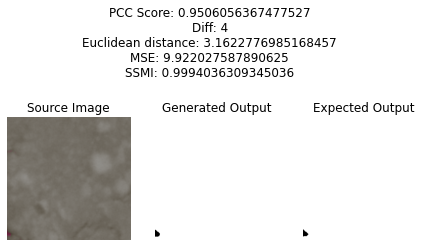

  2%|▏         | 79/3329 [06:05<3:17:30,  3.65s/it]

The amount of white pixels in the source image is 65271


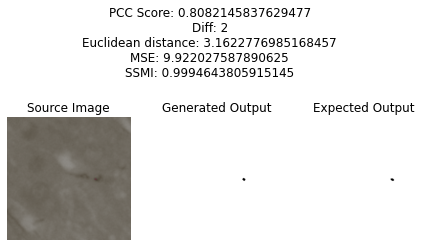

  2%|▏         | 80/3329 [06:08<3:11:33,  3.54s/it]

The amount of white pixels in the source image is 65263


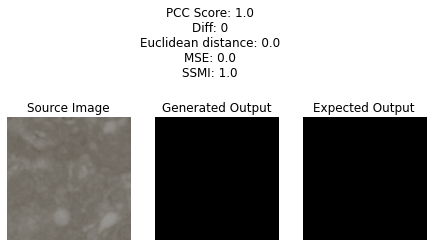

  2%|▏         | 81/3329 [06:16<4:20:10,  4.81s/it]

The amount of white pixels in the source image is 42234


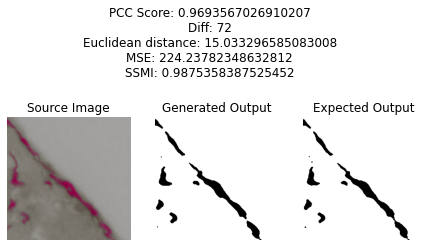

  2%|▏         | 82/3329 [06:22<4:38:05,  5.14s/it]

The amount of white pixels in the source image is 65495


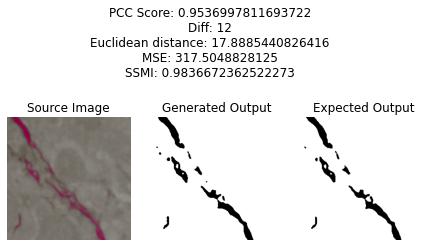

  2%|▏         | 83/3329 [06:25<4:01:39,  4.47s/it]

The amount of white pixels in the source image is 65154


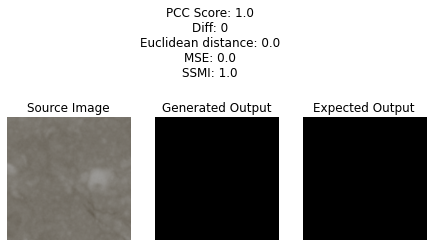

  3%|▎         | 84/3329 [06:32<4:49:18,  5.35s/it]

The amount of white pixels in the source image is 64971


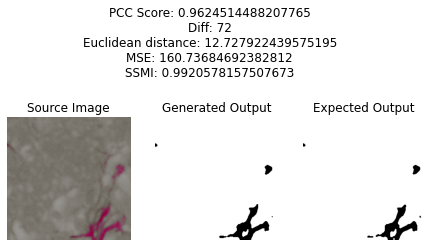

  3%|▎         | 85/3329 [06:39<5:08:04,  5.70s/it]

The amount of white pixels in the source image is 65411


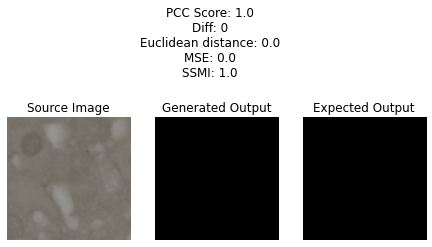

  3%|▎         | 86/3329 [06:47<5:43:40,  6.36s/it]

The amount of white pixels in the source image is 65479


  3%|▎         | 87/3329 [06:55<6:09:34,  6.84s/it]

The amount of white pixels in the source image is 65465


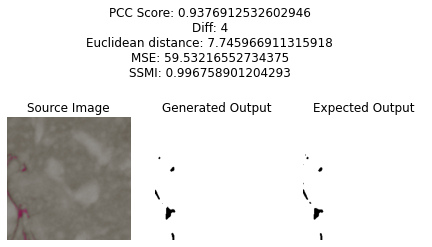

  3%|▎         | 88/3329 [06:58<5:06:24,  5.67s/it]

The amount of white pixels in the source image is 65408


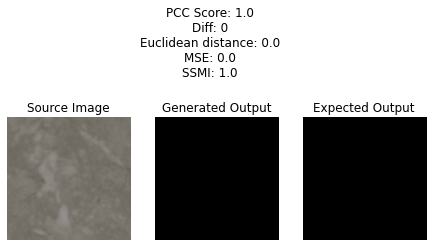

  3%|▎         | 89/3329 [07:05<5:37:28,  6.25s/it]

The amount of white pixels in the source image is 65310


  3%|▎         | 89/3329 [07:11<4:21:38,  4.85s/it]


KeyboardInterrupt: 

In [16]:
#%%time
###
### Don't forget to change the test set and the run date
###

model = load_model(model_run, compile=False)
for l in tqdm(range(samples)):

    src_image, tar_image = X1[[l]], X2[[l]]
    invariant_generator = invariant_datagen.flow(
    src_image)
    invariant_generator.next()


    invariant =  invariant_generator[0].copy()

    src_image = invariant  
    
    
    
    
    
    gen_image = model.predict(src_image)
    gen = (gen_image + abs(gen_image.min())) / 2.0
    # Threshold the source image to determine whether patch is empty
    white, black, thresh1 = threshold_fx.threshold_fx(A1, l, 0)
    print(f"The amount of white pixels in the source image is {white}")
    if white != 0:
        gen_calc, threshgen = threshold_fx.threshold_gen(gen, white, debug=False)
        true_calc, threshtar = threshold_fx.threshold_gen(tar_image, white)   
    else:
        gen_calc = 0
        true_calc = 0
        threshgen = np.full((thresh1.shape), 255)
        threshtar = np.full((thresh1.shape), 255)
    if np.mean(threshtar) == 0:
        true_calc = 0
        threshtar = np.full((thresh1.shape), 255)
    
    l1.append(gen_calc)
    l2.append(true_calc)
    
    
    
    src = cv2.cvtColor(src_image.squeeze(), cv2.COLOR_BGR2RGB)

    gen = np.array(threshgen)
    tar = np.array(threshtar)
    
    a = gen
    b = tar

    c = np.array((a-np.min(a))/(np.max(a)-np.min(a)))
    d = np.array((b-np.min(b))/(np.max(b)-np.min(b)))

    m = np.ravel(c)
    n = np.ravel(d)
    
    ms = mse(gen, tar)
    s = measure.compare_ssim(gen, tar, multichannel=True)
    mses.append(ms)
    mmsis.append(s)

    try:
        dst[l][0] = distance.euclidean(m, n)
    except:
        dst[l][0] = 0

    O = gen.ravel()
    G = tar.ravel()


    pcc ,p = pearsonr(O,G)
    if math.isnan(pcc):
        pccscore = 1.0
    else:
        pccscore = pcc
    pcc_sp[l][0] = pccscore

    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(threshgen.flatten().shape[0]):
        gen_pix = threshgen.flatten()[i]
        tar_pix = threshtar.flatten()[i]
        curve_tar.append(tar_pix)
        curve_gen.append(gen_pix)
        if gen_pix == 0:
            if tar_pix == 0:

                tp += 1
            else:

                fp += 1
        elif gen_pix == 255:
            if tar_pix == 255:

                tn += 1
            else:

                fn += 1
    try:
        pix_acc = (tp + tn) / (tp + tn + fp + fn)

        iou = tp / (tp + fp + fn)
        dice = (2 * tp) / ((2 * tp) + fp + fn)
    except:
        pix_acc = 1
        iou = 1
        dice = 1  
    pix_acc_list.append(pix_acc)
    iou_list.append(iou)
    dice_list.append(dice)

    
    

#     # plot roc curves
#     plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
#     plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
#     plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
#     # title
#     plt.title('ROC curve')
#     # x label
#     plt.xlabel('False Positive Rate')
#     # y label
#     plt.ylabel('True Positive rate')

#     plt.legend(loc='best')
#     plt.savefig('ROC',dpi=300)
#     plt.show();

    num = random.randint(0, 100)
    if num > 15: 
        src = (src + 1) / 2
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (7.5, 5))
        fig.suptitle(f"PCC Score: {pccscore}\nDiff: {abs(gen_calc - true_calc)}\nEuclidean distance: {dst[l][0]}\nMSE: {ms}\nSSMI: {s}")
        ax[0].set_title(f'Source Image')
        ax[0].imshow(src, cmap='gray')
        ax[0].axis('off')
        ax[1].set_title('Generated Output')
        ax[1].imshow(threshgen, cmap='gray')
        ax[1].axis('off')
        ax[2].set_title('Expected Output')
        ax[2].imshow(threshtar, cmap='gray')
        ax[2].axis('off')
        plt.show()

    

avg_dst = np.average(dst, axis = 0)
std_dst = np.std(dst, axis = 0)

avg = np.average(pcc_sp, axis = 0)
std = np.std(pcc_sp, axis = 0)
pcc_score  = str(avg)
pcc_std = str(std)


diff = 0
diffuse = list()
for i in range(samples):
    diffuse.append(abs(l1[i] - l2[i]))
diff = np.sum(diffuse)
mean_errorcalc = np.mean(diffuse)
std_errorcalc = np.std(diffuse)
diffr = 0
for i in range(len(l1)):
    diffr += (l1[i] - l2[i])
correlation, p_value = stats.pearsonr(l1, l2)

pix_acc_mean = statistics.mean(pix_acc_list)
miou = statistics.mean(iou_list)
dice_mean = statistics.mean(dice_list)

print(f"PCC score: {round(float(avg[0]), 2)} with standard deviation {round(float(std[0]), 2)}.")
print(f"FQM absolute difference per sample: {round(diff / samples, 2)} with standard deviation {round(std_errorcalc, 2)}.\nFQM balanced difference per sample: {round(diffr / samples, 2)}.\nFQM correlation: {round(correlation, 4)}.")
print(f"Euclidean distance: {round(float(avg_dst[0]), 2)}, with std {round(float(std_dst[0]), 2)}")
print(f"MSE {round(float(np.mean(mses)), 2)}, with std {round(float(np.std(mses)), 2)}")
print(f"SSMI {round(float(np.mean(mmsis)), 2)}, with std {round(float(np.std(mmsis)), 2)}")
print('pix acc mean is ', pix_acc_mean)
print('miou is ', miou)

In [32]:
threshtar

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(curve_tar, curve_gen, pos_label=255)
print(f'fpr1 {fpr1}, tpr1 {tpr1} thresh1 {thresh1}')
auc_score1 = roc_auc_score(curve_tar, curve_gen)
print(f'auc_score is {auc_score1}')

In [15]:
import pickle

with open("curve_gen_train.txt", "wb") as fp:   #Pickling
    pickle.dump(curve_gen, fp)

In [19]:
random_probs = [0 for i in range(len(curve_tar))]
p_fpr, p_tpr, _ = roc_curve(curve_tar, random_probs, pos_label=255)

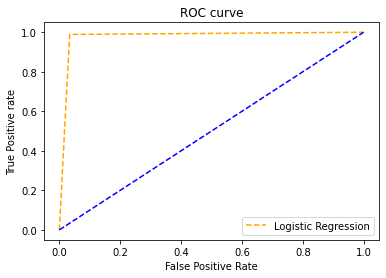

In [20]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

In [21]:
train_df = pd.read_csv('train_evals.csv')
train_df.head()

Dice  IOU  PCC_score  Pixel acc             Run_date  SSIM  SSIM_std  \
0   NaN  NaN       0.90        NaN           2021-01-13  0.90      0.08   
1   NaN  NaN       0.91        NaN           2021-01-14  0.91      0.08   
2   NaN  NaN       0.90        NaN  2021-01-11 00:00:00  0.91      0.08   
3   NaN  NaN       0.91        NaN  2021-01-17 00:00:00  0.91      0.08   
4   NaN  NaN       0.90        NaN  2021-01-11 00:00:00  0.91      0.08   

                                         description  euclidean_dist  \
0  \n           REGULAR BRIGHT DARK\nPREPROCESSIN...           40.95   
1  \n           REGULAR BRIGHT DARK\nPREPROCESSIN...           39.07   
2  \n           REGULAR BRIGHT DARK\nPREPROCESSIN...           40.12   
3  REGULAR BRIGHT DARK\nPREPROCESSING: BRIGHTNESS...           38.43   
4  \n           REGULAR BRIGHT DARK\nPREPROCESSIN...           38.89   

   euclidean_std  fqm_absolute  fqm_balanced  fqm_correlation  fqm_std  \
0          26.89       1126.76       -410.07           0.9770  2288.30   
1          25.82       1095.84        220.63           0.9788  2156.41   
2          26.12       1109.60       -439.10           0.9784  2198.99   
3          25.79        971.70       -116.88           0.9767  2333.15   
4          26.22       1042.13       -170.53           0.9748  2411.36   

   model_num      mse  mse_std  pcc_std Run_ID  
0         -1  2381.22  2604.69     0.09    NaN  
1         -1  2175.73  2446.32     0.08    NaN  
2         -1  2273.73  2388.59     0.08    NaN  
3         -1  2125.44  2536.37     0.08    NaN  
4         -1  2182.55  2611.88     0.09    NaN

In [22]:
data = {'Run_date':  date_of_run,
        'PCC_score': [round(float(avg[0]), 2)],
        'pcc_std': [round(float(std[0]), 2)],
       'fqm_absolute': [round(diff / samples, 2)   ],
       'fqm_std': [round(std_errorcalc, 2)],
       'fqm_balanced': [round(diffr / samples, 2)],
       'fqm_correlation': [round(correlation, 4)],
       'euclidean_dist': [round(float(avg_dst[0]), 2)],
       'euclidean_std': [round(float(std_dst[0]), 2)],
       'mse': [round(float(np.mean(mses)), 2)],
       'mse_std': [round(float(np.std(mses)), 2)],
       'SSIM': [round(float(np.mean(mmsis)), 2)],
              'Pixel acc': [round(float(pix_acc_mean), 4)],
       'SSIM_std': [round(float(np.std(mmsis)), 2)],
                 'IOU': [round(float(miou), 4)],
          'Dice': [round(float(dice_mean), 4)],
       'description': [description
],
       'model_num': model_number}

In [23]:
df = pd.DataFrame(data)
df['Run_date'] = pd.to_datetime(df['Run_date'])
df

Run_date  PCC_score  pcc_std  fqm_absolute  fqm_std  fqm_balanced  \
0 2021-06-30       0.95     0.06        504.76  3010.66         27.49   

   fqm_correlation  euclidean_dist  euclidean_std      mse  mse_std  SSIM  \
0           0.9756           25.31          17.81  1070.97  3027.71  0.95   

   Pixel acc  SSIM_std     IOU    Dice description model_num  
0     0.9835      0.06  0.9357  0.9546  \ncut it\n       160

In [24]:
frames = [train_df, df]
result = pd.concat(frames)
result.tail()

Dice     IOU  PCC_score  Pixel acc             Run_date  SSIM  \
188  0.9301  0.9034       0.93     0.9749                  NaN  0.93   
189  0.7208  0.6673       0.71     0.8981                  NaN  0.79   
190  0.9547  0.9357       0.95     0.9835  2021-06-30 00:00:00  0.95   
191  0.9659  0.9519       0.97     0.9870                  NaN  0.96   
0    0.9546  0.9357       0.95     0.9835  2021-06-30 00:00:00  0.95   

     SSIM_std     description  euclidean_dist  euclidean_std  fqm_absolute  \
188      0.07  \nview notes\n           33.31          22.30       1006.01   
189      0.14  \nview notes\n           70.87          40.41       2903.93   
190      0.06      \ncut it\n           25.31          17.81        503.98   
191      0.05  \nview notes\n           22.20          15.67        409.92   
0        0.06      \ncut it\n           25.31          17.81        504.76   

     fqm_balanced  fqm_correlation  fqm_std model_num      mse  mse_std  \
188        694.84           0.9861  2217.66       140  1631.23  2322.97   
189        -40.97           0.9452  3418.38       184  6622.92  4654.77   
190         27.88           0.9756  3010.94       160  1071.29  3028.49   
191        -27.03           0.9774  2839.00       230   843.93  2835.75   
0           27.49           0.9756  3010.66       160  1070.97  3027.71   

     pcc_std    Run_ID  
188     0.08  test0212  
189     0.19  test0214  
190     0.06       NaN  
191     0.05  test0224  
0       0.06       NaN

In [25]:
result.to_csv('train_evals.csv', index=False)

## Test Data

In [9]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

data = load(test_file)
[A1, A2] = data['arr_0'], data['arr_1'] 
X1 = (A1 - 127.5) / 127.5
X2 = (A2 - 127.5) / 127.5
print('Loaded', X1.shape)

samples = X1.shape[0]


Loaded (154, 256, 256, 3)


In [10]:
l1 = []
l2 = []
corrs = []
stds = []
EDs = []
eustds = []
mses = []
mmsis = []
precision_list = []
recall_list = []
split_list = []
merge_list = []
error_list = []
pix_acc_list = []
iou_list = []
dice_list = []
curve_tar = []
curve_gen = []
pcc_sp = np.zeros((samples,1), dtype='float32')
ED = np.zeros((samples,1), dtype='float32')
dst = np.zeros((samples,1), dtype='float32')

  0%|          | 0/154 [00:00<?, ?it/s]

Gen_calc is 65536
True calc is 0


/project/6003019/sergei/test2/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide
/project/6003019/sergei/test2/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide
/project/6003019/sergei/test2/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


0


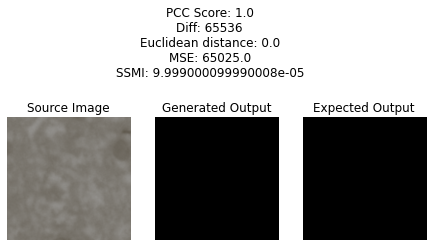

  1%|          | 1/154 [00:08<20:49,  8.17s/it]

Gen_calc is 443
True calc is 638
1


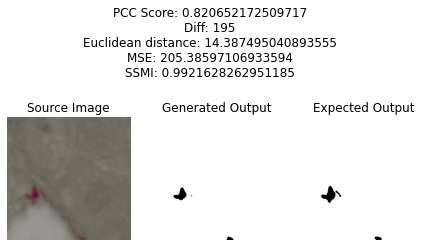

  1%|▏         | 2/154 [00:10<11:34,  4.57s/it]

Gen_calc is 15828
True calc is 15878
2


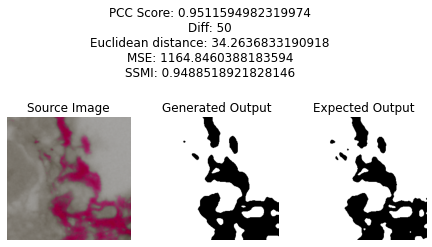

  2%|▏         | 3/154 [00:12<08:37,  3.43s/it]

Gen_calc is 65536
True calc is 0
3


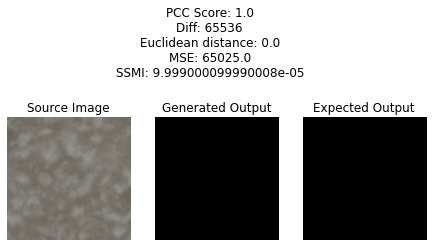

  3%|▎         | 4/154 [00:15<08:41,  3.47s/it]

Gen_calc is 65536
True calc is 17
4


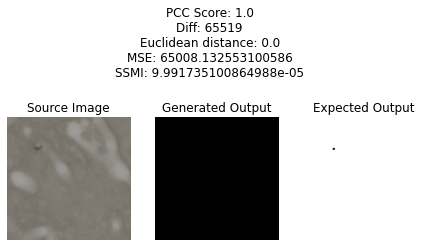

  3%|▎         | 5/154 [00:17<07:16,  2.93s/it]

Gen_calc is 61
True calc is 110
5


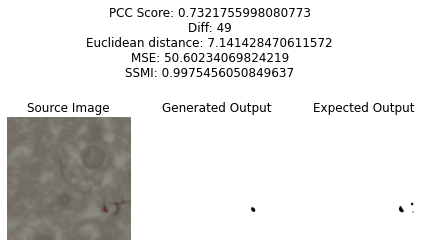

  4%|▍         | 6/154 [00:19<06:26,  2.61s/it]

Gen_calc is 1232
True calc is 1255
6


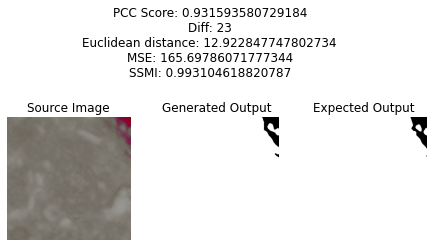

  5%|▍         | 7/154 [00:21<05:52,  2.40s/it]

Gen_calc is 2
True calc is 15
7


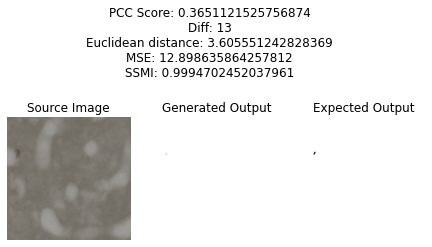

  5%|▌         | 8/154 [00:24<05:47,  2.38s/it]

Gen_calc is 151
True calc is 183
8


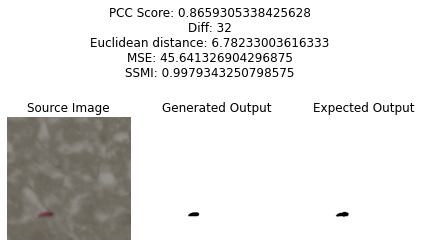

  6%|▌         | 9/154 [00:26<05:25,  2.24s/it]

Gen_calc is 47
True calc is 55
9


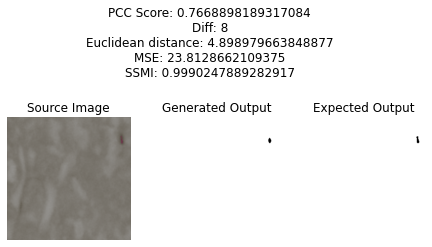

  6%|▋         | 10/154 [00:28<05:13,  2.18s/it]

Gen_calc is 510
True calc is 910
10


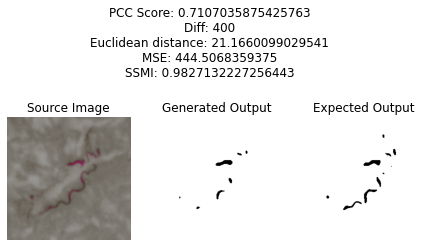

  7%|▋         | 11/154 [00:30<05:05,  2.13s/it]

Gen_calc is 65536
True calc is 0
11


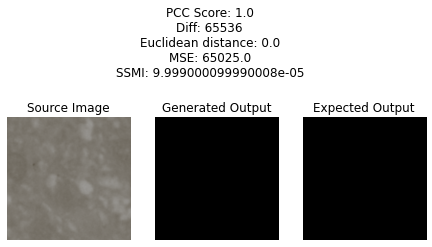

  8%|▊         | 12/154 [00:33<05:54,  2.50s/it]

Gen_calc is 65536
True calc is 0
12


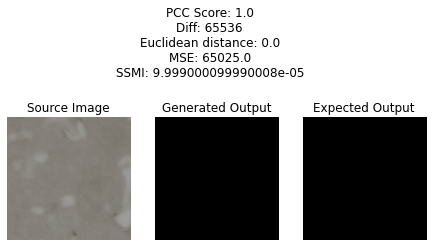

  8%|▊         | 13/154 [00:37<06:40,  2.84s/it]

Gen_calc is 65536
True calc is 0
13


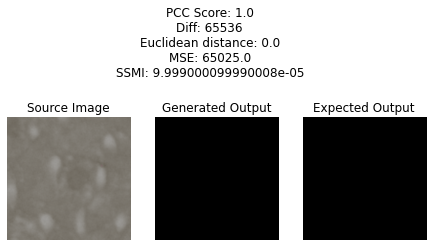

  9%|▉         | 14/154 [00:40<07:19,  3.14s/it]

Gen_calc is 65536
True calc is 0
14


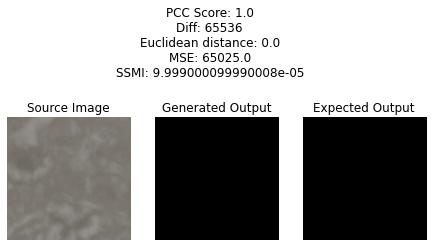

 10%|▉         | 15/154 [00:44<07:32,  3.26s/it]

Gen_calc is 65536
True calc is 4


 10%|█         | 16/154 [00:46<06:24,  2.79s/it]

Gen_calc is 65536
True calc is 0
16


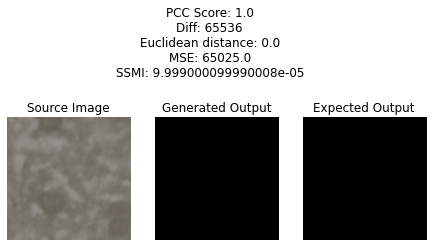

 11%|█         | 17/154 [00:49<06:55,  3.03s/it]

Gen_calc is 7802
True calc is 6504
17


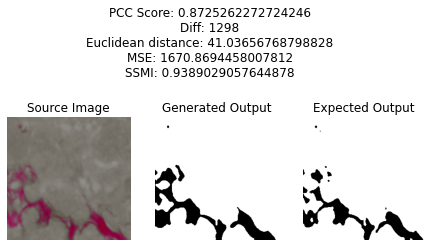

 12%|█▏        | 18/154 [00:51<06:10,  2.72s/it]

Gen_calc is 0
True calc is 0
18


 12%|█▏        | 19/154 [00:57<08:01,  3.57s/it]

Gen_calc is 65536
True calc is 0
19


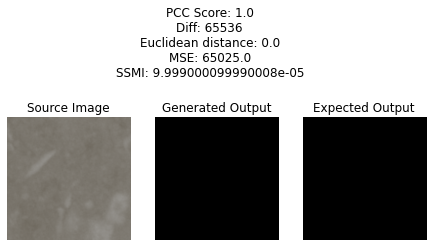

 13%|█▎        | 20/154 [01:00<08:00,  3.59s/it]

Gen_calc is 65536
True calc is 0
20


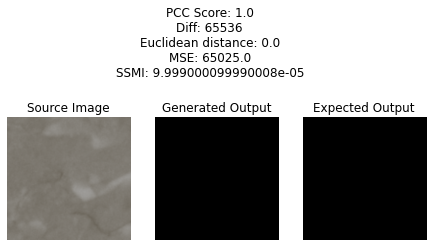

 14%|█▎        | 21/154 [01:04<07:59,  3.61s/it]

Gen_calc is 65536
True calc is 0
21


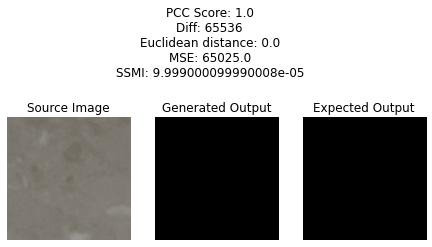

 14%|█▍        | 22/154 [01:08<07:57,  3.62s/it]

Gen_calc is 50
True calc is 85
22


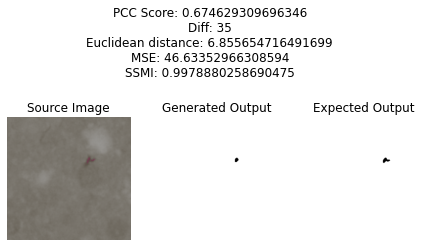

 15%|█▍        | 23/154 [01:10<07:07,  3.26s/it]

Gen_calc is 65536
True calc is 0
23


 16%|█▌        | 24/154 [01:14<07:10,  3.31s/it]

Gen_calc is 65536
True calc is 0
24


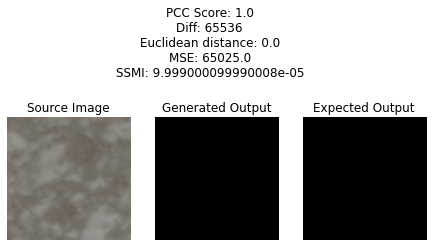

 16%|█▌        | 25/154 [01:17<07:19,  3.41s/it]

Gen_calc is 4920
True calc is 4465
25


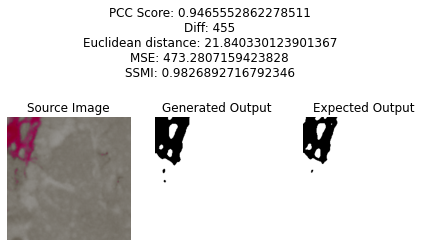

 17%|█▋        | 26/154 [01:19<06:26,  3.02s/it]

Gen_calc is 65536
True calc is 0
26


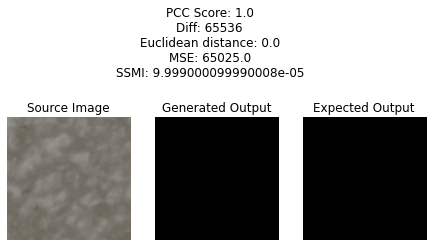

 18%|█▊        | 27/154 [01:23<06:43,  3.17s/it]

Gen_calc is 212
True calc is 391
27


 18%|█▊        | 28/154 [01:25<05:54,  2.81s/it]

Gen_calc is 44
True calc is 58
28


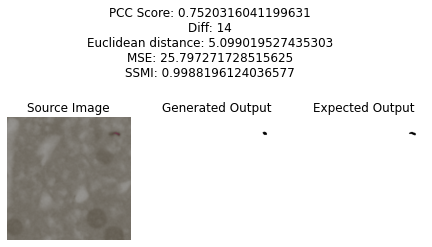

 19%|█▉        | 29/154 [01:28<06:21,  3.06s/it]

Gen_calc is 65536
True calc is 0
29


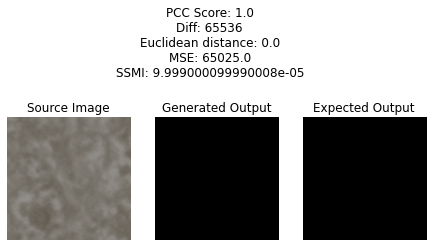

 19%|█▉        | 30/154 [01:32<06:31,  3.16s/it]

Gen_calc is 65536
True calc is 0
30


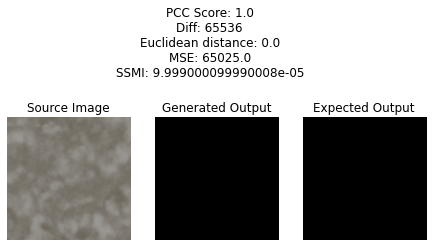

 20%|██        | 31/154 [01:35<06:41,  3.27s/it]

Gen_calc is 37
True calc is 22
31


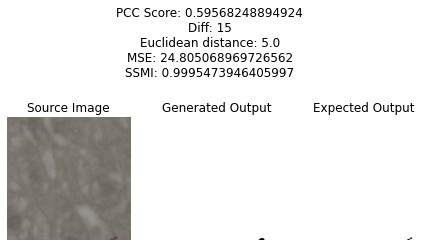

 21%|██        | 32/154 [01:37<05:51,  2.88s/it]

Gen_calc is 65536
True calc is 0
32


 21%|██▏       | 33/154 [01:41<06:13,  3.08s/it]

Gen_calc is 1461
True calc is 1217
33


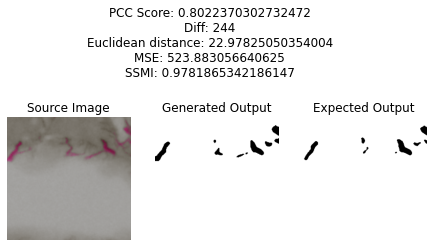

 22%|██▏       | 34/154 [01:43<05:32,  2.77s/it]

Gen_calc is 65536
True calc is 0
34


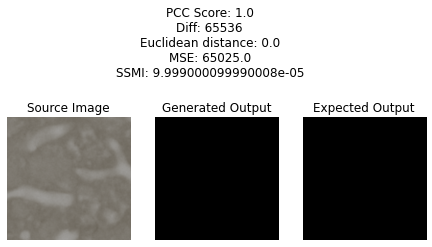

 23%|██▎       | 35/154 [01:46<05:58,  3.01s/it]

Gen_calc is 65536
True calc is 0
35


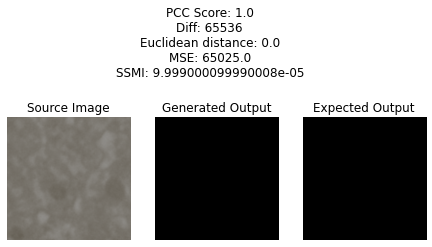

 23%|██▎       | 36/154 [01:50<06:19,  3.21s/it]

Gen_calc is 65536
True calc is 0
36


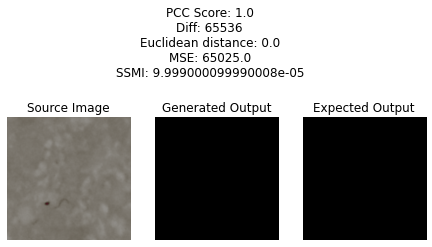

 24%|██▍       | 37/154 [01:54<06:27,  3.31s/it]

Gen_calc is 65536
True calc is 0
37


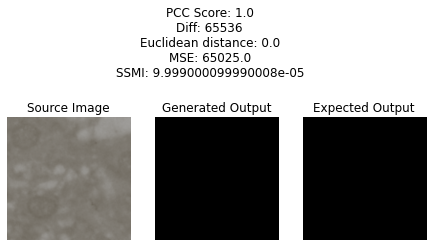

 25%|██▍       | 38/154 [01:57<06:39,  3.44s/it]

Gen_calc is 65536
True calc is 0
38


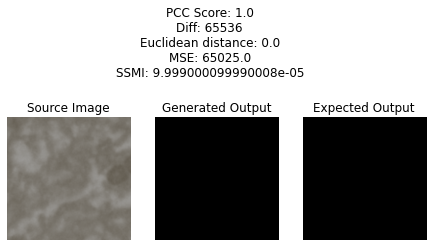

 25%|██▌       | 39/154 [02:01<06:51,  3.57s/it]

Gen_calc is 65536
True calc is 0
39


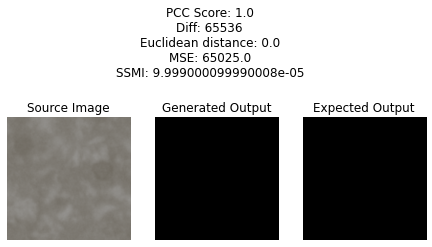

 26%|██▌       | 40/154 [02:05<06:46,  3.57s/it]

Gen_calc is 65536
True calc is 14
40


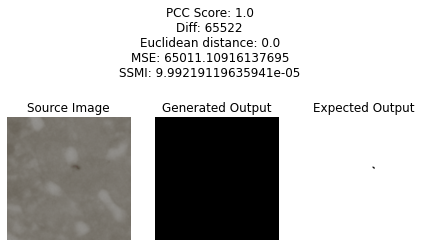

 27%|██▋       | 41/154 [02:07<05:49,  3.10s/it]

Gen_calc is 65536
True calc is 0
41


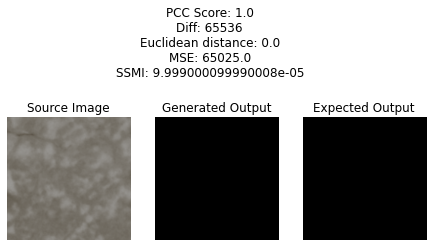

 27%|██▋       | 42/154 [02:10<06:02,  3.24s/it]

Gen_calc is 139
True calc is 377
42


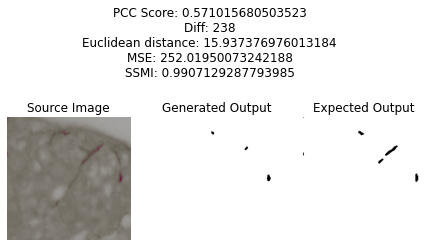

 28%|██▊       | 43/154 [02:13<05:20,  2.88s/it]

Gen_calc is 66
True calc is 2
43


 29%|██▊       | 44/154 [02:14<04:47,  2.61s/it]

Gen_calc is 65536
True calc is 0
44


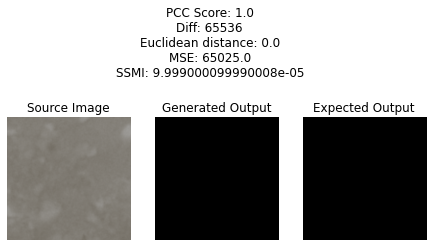

 29%|██▉       | 45/154 [02:18<05:23,  2.97s/it]

Gen_calc is 39
True calc is 56
45


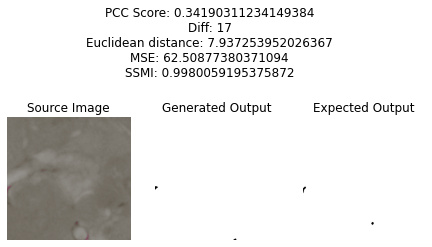

 30%|██▉       | 46/154 [02:21<05:02,  2.81s/it]

Gen_calc is 433
True calc is 280
46


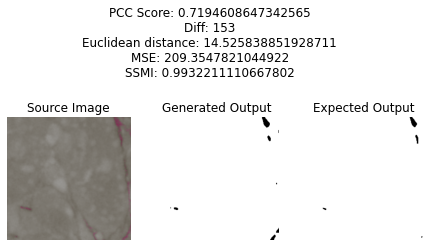

 31%|███       | 47/154 [02:23<04:34,  2.56s/it]

Gen_calc is 65536
True calc is 0
47


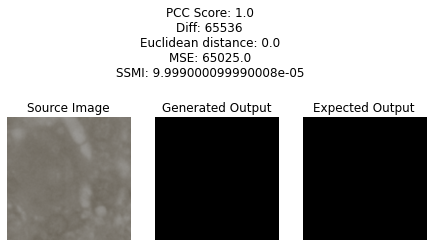

 31%|███       | 48/154 [02:26<05:04,  2.87s/it]

Gen_calc is 65536
True calc is 0
48


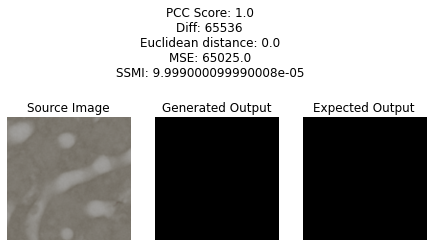

 32%|███▏      | 49/154 [02:30<05:23,  3.08s/it]

Gen_calc is 57
True calc is 65
49


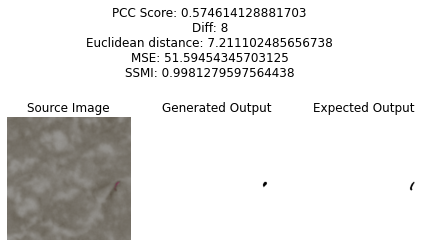

 32%|███▏      | 50/154 [02:34<05:43,  3.30s/it]

Gen_calc is 14
True calc is 110
50


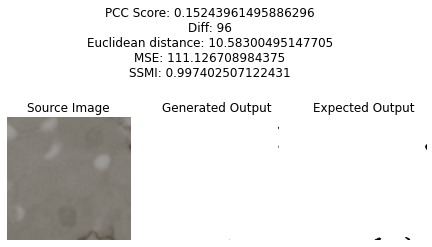

 33%|███▎      | 51/154 [02:36<05:04,  2.96s/it]

Gen_calc is 65536
True calc is 0
51


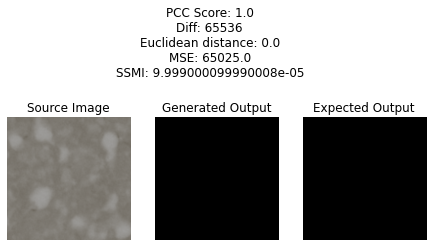

 34%|███▍      | 52/154 [02:39<05:19,  3.13s/it]

Gen_calc is 65536
True calc is 0
52


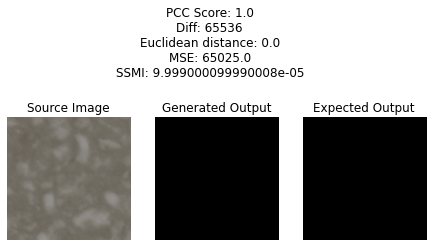

 34%|███▍      | 53/154 [02:43<05:25,  3.22s/it]

Gen_calc is 65536
True calc is 0
53


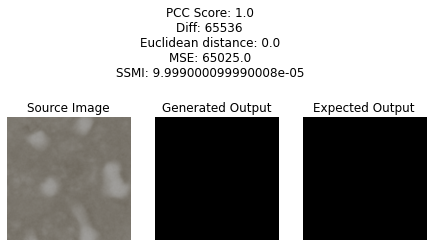

 35%|███▌      | 54/154 [02:46<05:26,  3.26s/it]

Gen_calc is 83
True calc is 59
54


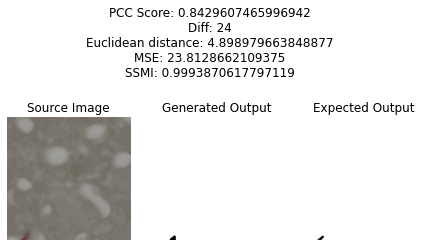

 36%|███▌      | 55/154 [02:48<04:49,  2.92s/it]

Gen_calc is 10428
True calc is 9461
55


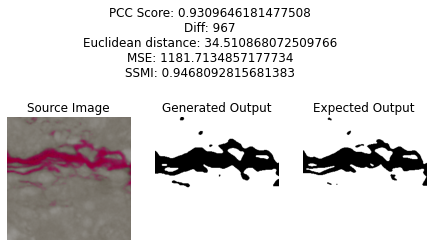

 36%|███▋      | 56/154 [02:50<04:18,  2.64s/it]

Gen_calc is 65536
True calc is 0
56


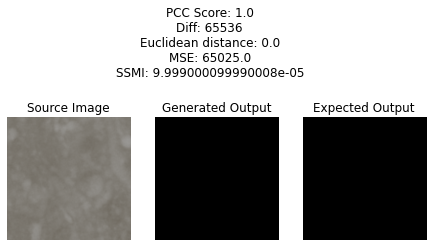

 37%|███▋      | 57/154 [02:54<04:45,  2.94s/it]

Gen_calc is 949
True calc is 807
57


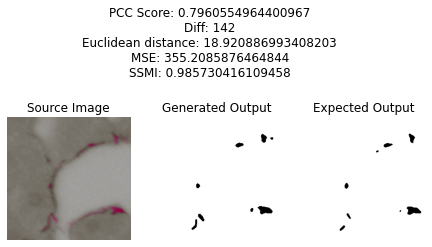

 38%|███▊      | 58/154 [02:56<04:15,  2.66s/it]

Gen_calc is 405
True calc is 494
58


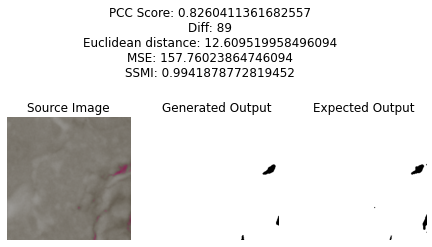

 38%|███▊      | 59/154 [02:58<03:55,  2.48s/it]

Gen_calc is 14411
True calc is 14941
59


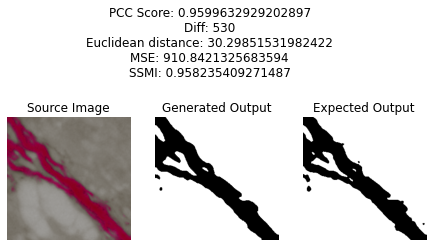

 39%|███▉      | 60/154 [03:00<03:42,  2.36s/it]

Gen_calc is 65536
True calc is 4
60


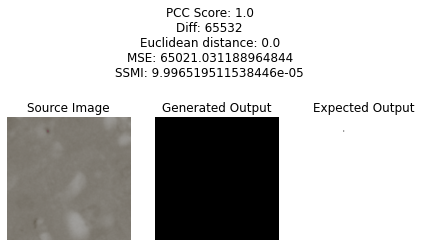

 40%|███▉      | 61/154 [03:02<03:28,  2.25s/it]

Gen_calc is 65536
True calc is 0
61


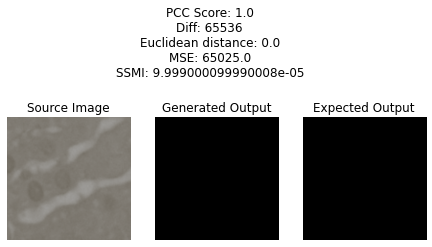

 40%|████      | 62/154 [03:05<03:56,  2.57s/it]

Gen_calc is 45
True calc is 127
62


 41%|████      | 63/154 [03:07<03:41,  2.43s/it]

Gen_calc is 75
True calc is 102
63


 42%|████▏     | 64/154 [03:10<03:32,  2.36s/it]

Gen_calc is 65536
True calc is 0
64


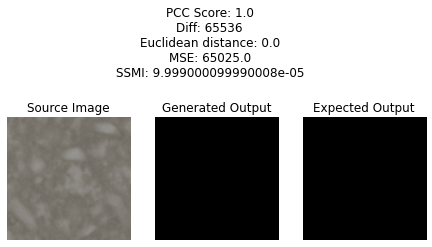

 42%|████▏     | 65/154 [03:13<04:00,  2.70s/it]

Gen_calc is 65536
True calc is 0
65


 43%|████▎     | 66/154 [03:17<04:23,  2.99s/it]

Gen_calc is 5614
True calc is 4976
66


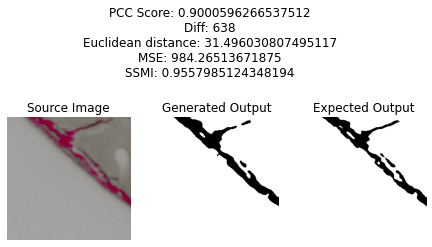

 44%|████▎     | 67/154 [03:19<03:56,  2.72s/it]

Gen_calc is 116
True calc is 141
67


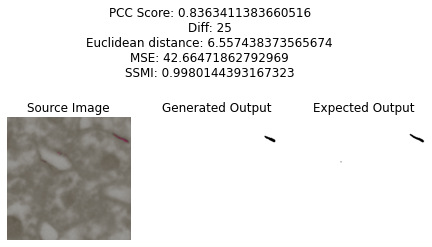

 44%|████▍     | 68/154 [03:21<03:35,  2.50s/it]

Gen_calc is 451
True calc is 367
68


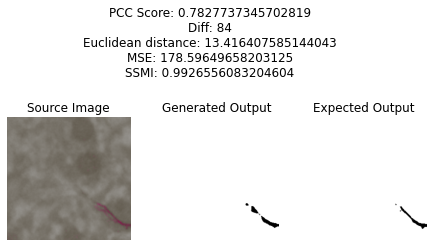

 45%|████▍     | 69/154 [03:23<03:18,  2.34s/it]

Gen_calc is 0
True calc is 0
69


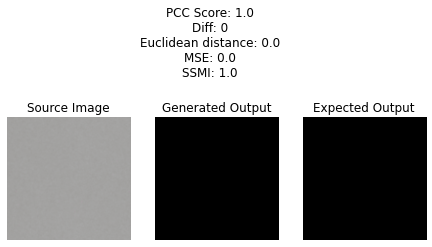

 45%|████▌     | 70/154 [03:29<04:46,  3.41s/it]

Gen_calc is 65536
True calc is 0
70


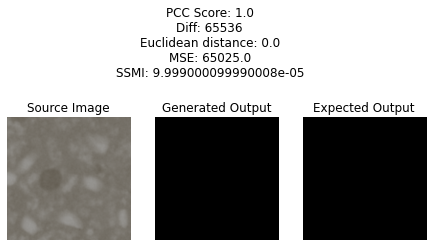

 46%|████▌     | 71/154 [03:34<05:34,  4.03s/it]

Gen_calc is 65536
True calc is 0
71


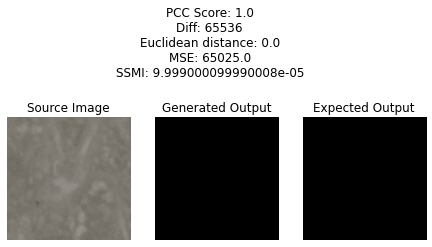

 47%|████▋     | 72/154 [03:38<05:14,  3.83s/it]

Gen_calc is 65536
True calc is 9
72


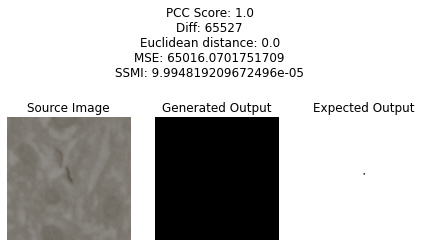

 47%|████▋     | 73/154 [03:40<04:23,  3.26s/it]

Gen_calc is 12801
True calc is 12068
73


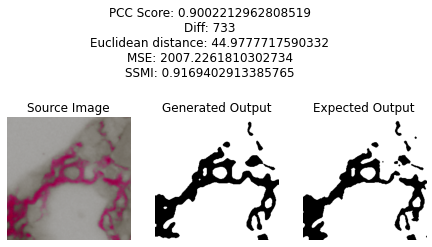

 48%|████▊     | 74/154 [03:42<03:51,  2.90s/it]

Gen_calc is 970
True calc is 912
74


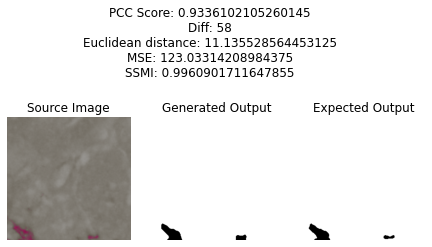

 49%|████▊     | 75/154 [03:44<03:27,  2.62s/it]

Gen_calc is 65536
True calc is 0
75


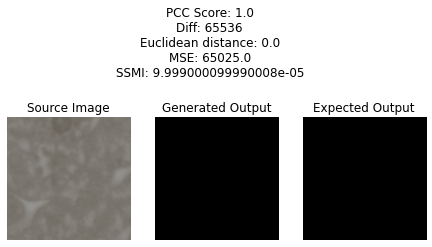

 49%|████▉     | 76/154 [03:47<03:44,  2.87s/it]

Gen_calc is 94
True calc is 165
76


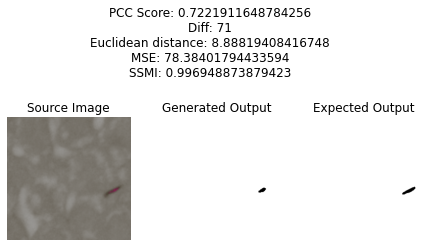

 50%|█████     | 77/154 [03:49<03:29,  2.72s/it]

Gen_calc is 98
True calc is 65
77


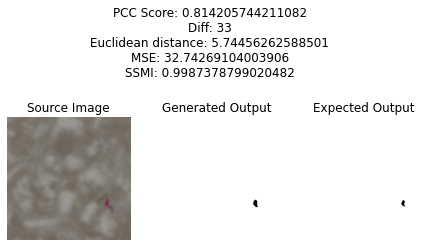

 51%|█████     | 78/154 [03:51<03:10,  2.50s/it]

Gen_calc is 62
True calc is 76
78


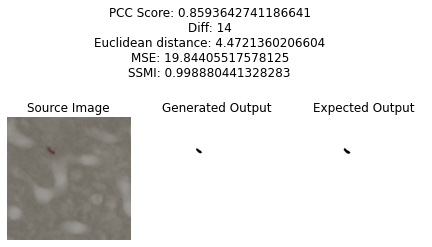

 51%|█████▏    | 79/154 [03:53<02:55,  2.34s/it]

Gen_calc is 65536
True calc is 0
79


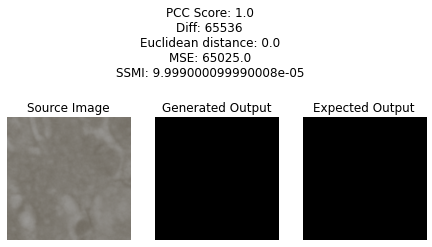

 52%|█████▏    | 80/154 [03:57<03:20,  2.71s/it]

Gen_calc is 65536
True calc is 0
80


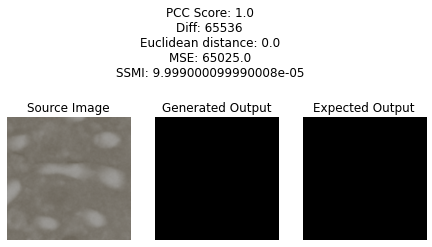

 53%|█████▎    | 81/154 [04:00<03:32,  2.91s/it]

Gen_calc is 65536
True calc is 0
81


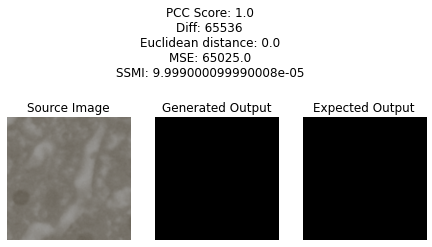

 53%|█████▎    | 82/154 [04:04<03:41,  3.08s/it]

Gen_calc is 65536
True calc is 0
82


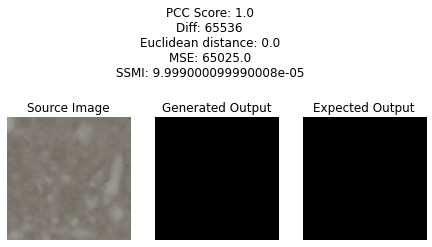

 54%|█████▍    | 83/154 [04:08<03:53,  3.29s/it]

Gen_calc is 65536
True calc is 0
83


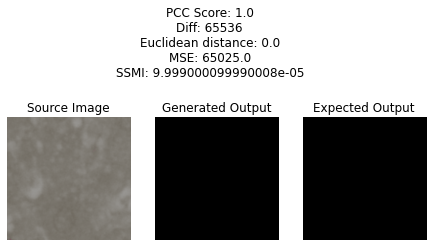

 55%|█████▍    | 84/154 [04:12<04:04,  3.49s/it]

Gen_calc is 65536
True calc is 0
84


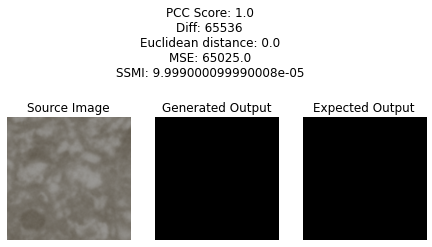

 55%|█████▌    | 85/154 [04:15<04:04,  3.54s/it]

Gen_calc is 1624
True calc is 1998
85


 56%|█████▌    | 86/154 [04:17<03:28,  3.07s/it]

Gen_calc is 61
True calc is 108
86


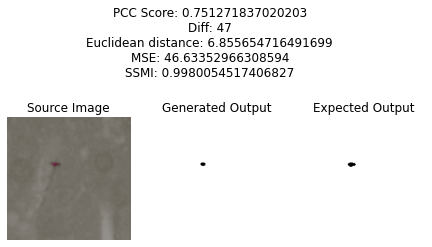

 56%|█████▋    | 87/154 [04:19<03:06,  2.78s/it]

Gen_calc is 65536
True calc is 0
87


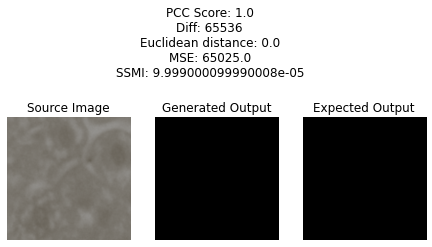

 57%|█████▋    | 88/154 [04:23<03:17,  3.00s/it]

Gen_calc is 3797
True calc is 3972
88


 58%|█████▊    | 89/154 [04:25<02:54,  2.69s/it]

Gen_calc is 65536
True calc is 0
89


 58%|█████▊    | 90/154 [04:28<03:11,  3.00s/it]

Gen_calc is 65536
True calc is 6
90


 59%|█████▉    | 91/154 [04:31<02:52,  2.74s/it]

Gen_calc is 65536
True calc is 0
91


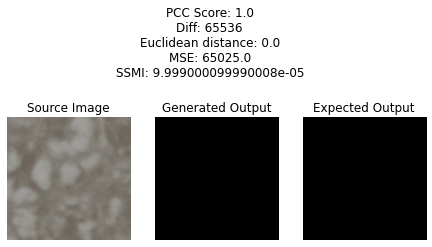

 60%|█████▉    | 92/154 [04:36<03:35,  3.48s/it]

Gen_calc is 2998
True calc is 2334
92


 60%|██████    | 93/154 [04:38<03:04,  3.02s/it]

Gen_calc is 65536
True calc is 54
93


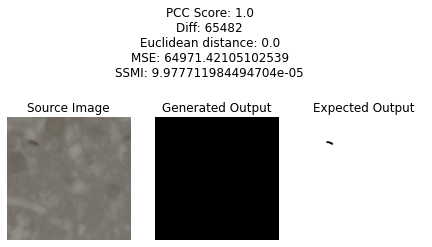

 61%|██████    | 94/154 [04:40<02:42,  2.70s/it]

Gen_calc is 65536
True calc is 0
94


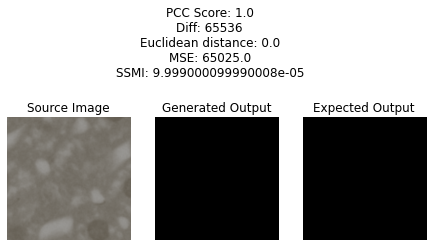

 62%|██████▏   | 95/154 [04:43<02:52,  2.92s/it]

Gen_calc is 1
True calc is 0
95


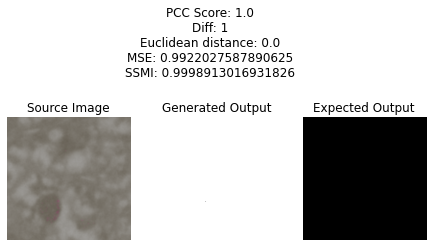

 62%|██████▏   | 96/154 [04:47<02:58,  3.08s/it]

Gen_calc is 65536
True calc is 0
96


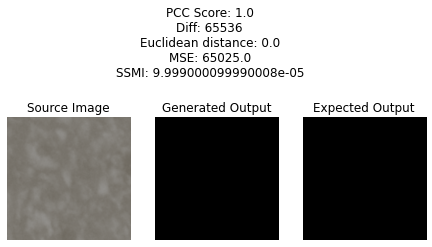

 63%|██████▎   | 97/154 [04:50<03:06,  3.28s/it]

Gen_calc is 20060
True calc is 20343
97


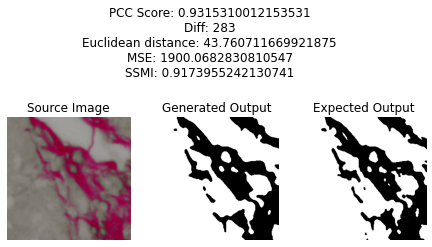

 64%|██████▎   | 98/154 [04:53<02:49,  3.02s/it]

Gen_calc is 3
True calc is 0
98


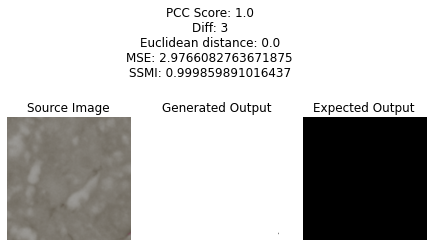

 64%|██████▍   | 99/154 [04:56<02:54,  3.18s/it]

Gen_calc is 758
True calc is 1122
99


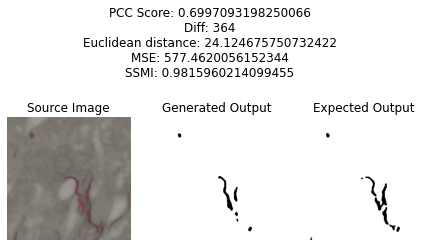

 65%|██████▍   | 100/154 [04:58<02:32,  2.83s/it]

Gen_calc is 1234
True calc is 1185
100


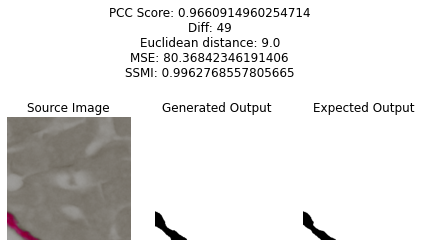

 66%|██████▌   | 101/154 [05:00<02:16,  2.57s/it]

Gen_calc is 3
True calc is 47
101


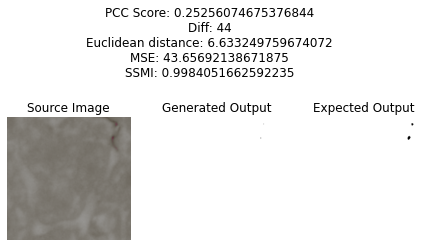

 66%|██████▌   | 102/154 [05:02<02:04,  2.39s/it]

Gen_calc is 65536
True calc is 0
102


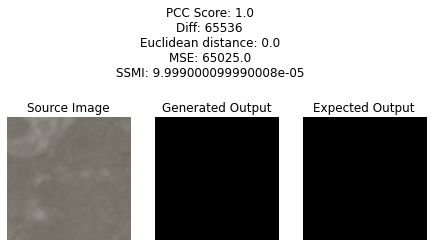

 67%|██████▋   | 103/154 [05:06<02:21,  2.77s/it]

Gen_calc is 65536
True calc is 0
103


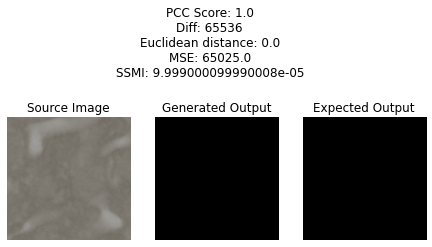

 68%|██████▊   | 104/154 [05:10<02:34,  3.08s/it]

Gen_calc is 65536
True calc is 0
104


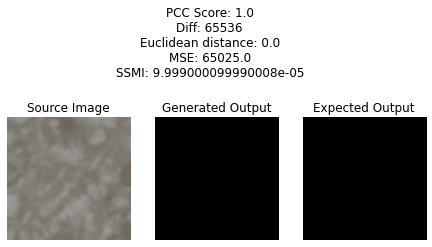

 68%|██████▊   | 105/154 [05:14<02:44,  3.35s/it]

Gen_calc is 65536
True calc is 0
105


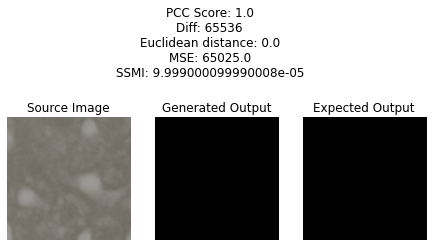

 69%|██████▉   | 106/154 [05:17<02:44,  3.43s/it]

Gen_calc is 65536
True calc is 0
106


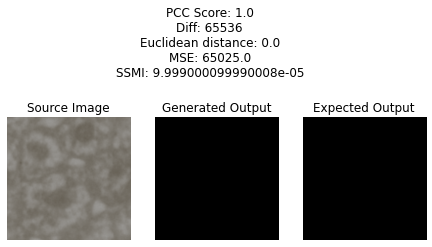

 69%|██████▉   | 107/154 [05:21<02:41,  3.44s/it]

Gen_calc is 32
True calc is 6
107


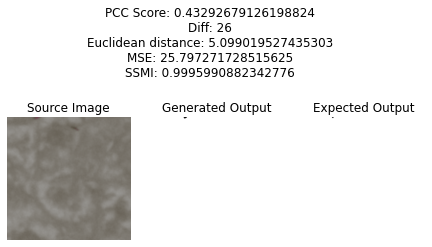

 70%|███████   | 108/154 [05:23<02:17,  3.00s/it]

Gen_calc is 65536
True calc is 0
108


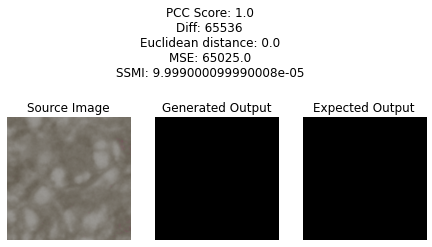

 71%|███████   | 109/154 [05:26<02:23,  3.19s/it]

Gen_calc is 48
True calc is 137
109


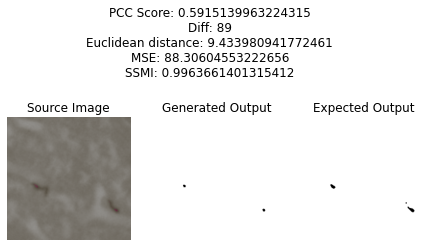

 71%|███████▏  | 110/154 [05:29<02:06,  2.88s/it]

Gen_calc is 1104
True calc is 821
110


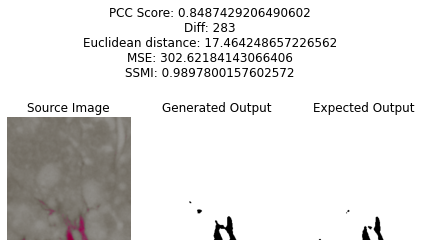

 72%|███████▏  | 111/154 [05:31<01:56,  2.70s/it]

Gen_calc is 65536
True calc is 24
111


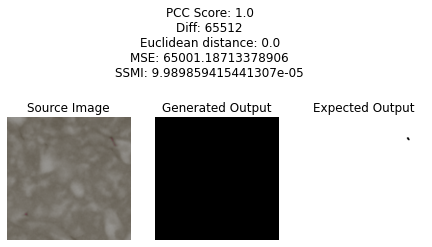

 73%|███████▎  | 112/154 [05:33<01:43,  2.47s/it]

Gen_calc is 7272
True calc is 7120
112


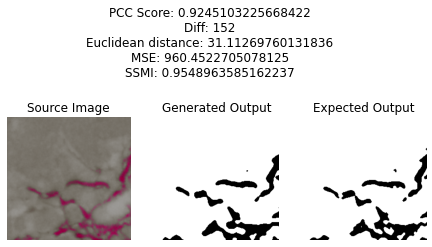

 73%|███████▎  | 113/154 [05:36<01:53,  2.76s/it]

Gen_calc is 811
True calc is 728
113


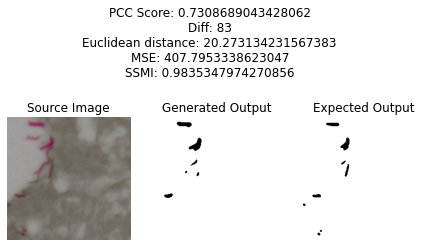

 74%|███████▍  | 114/154 [05:38<01:40,  2.52s/it]

Gen_calc is 119
True calc is 74
114


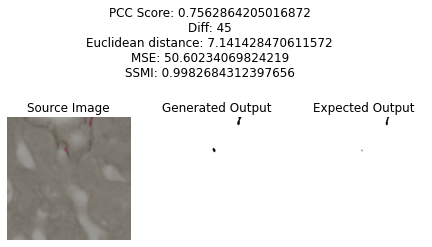

 75%|███████▍  | 115/154 [05:40<01:32,  2.36s/it]

Gen_calc is 178
True calc is 180
115


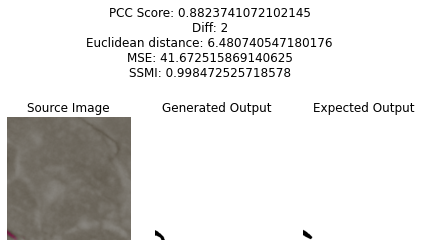

 75%|███████▌  | 116/154 [05:42<01:24,  2.23s/it]

Gen_calc is 131
True calc is 148
116


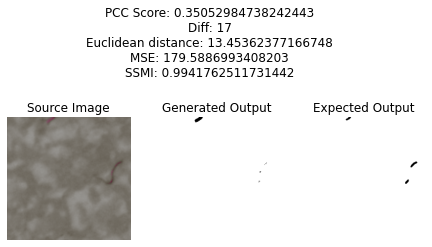

 76%|███████▌  | 117/154 [05:44<01:19,  2.15s/it]

Gen_calc is 65536
True calc is 0
117


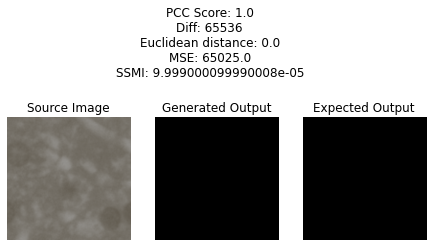

 77%|███████▋  | 118/154 [05:48<01:31,  2.55s/it]

Gen_calc is 65536
True calc is 0
118


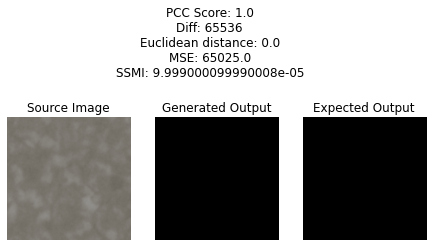

 77%|███████▋  | 119/154 [05:51<01:41,  2.90s/it]

Gen_calc is 65536
True calc is 0
119


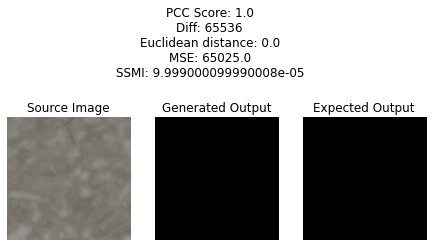

 78%|███████▊  | 120/154 [05:55<01:44,  3.07s/it]

Gen_calc is 65536
True calc is 0
120


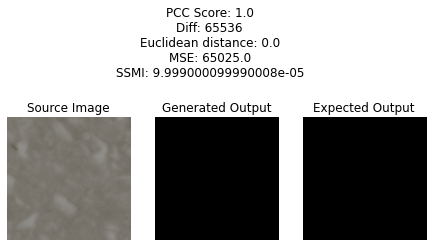

 79%|███████▊  | 121/154 [05:58<01:47,  3.26s/it]

Gen_calc is 60
True calc is 12
121


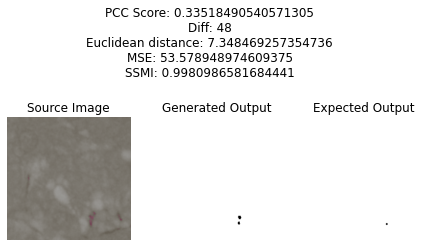

 79%|███████▉  | 122/154 [06:00<01:31,  2.87s/it]

Gen_calc is 65536
True calc is 0
122


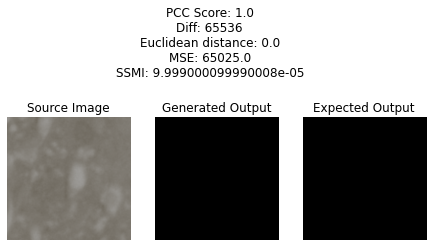

 80%|███████▉  | 123/154 [06:04<01:33,  3.03s/it]

Gen_calc is 65536
True calc is 0


 81%|████████  | 124/154 [06:07<01:32,  3.10s/it]

Gen_calc is 65536
True calc is 0
124


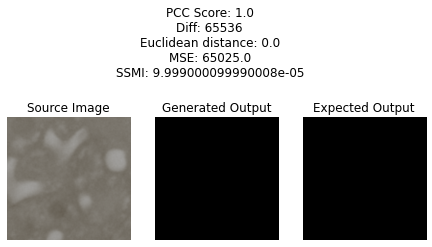

 81%|████████  | 125/154 [06:11<01:33,  3.23s/it]

Gen_calc is 76
True calc is 0
125


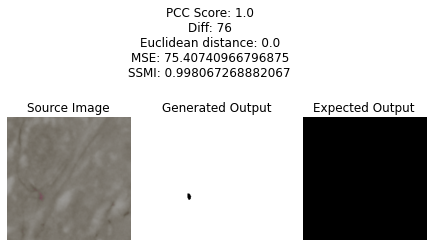

 82%|████████▏ | 126/154 [06:14<01:34,  3.36s/it]

Gen_calc is 4807
True calc is 5019
126


 82%|████████▏ | 127/154 [06:16<01:20,  2.97s/it]

Gen_calc is 65536
True calc is 0
127


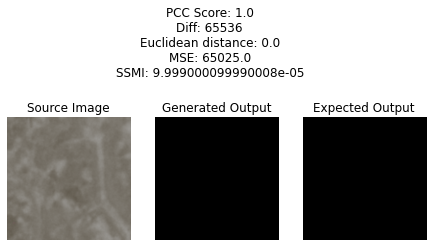

 83%|████████▎ | 128/154 [06:20<01:21,  3.14s/it]

Gen_calc is 65536
True calc is 0
128


 84%|████████▍ | 129/154 [06:23<01:20,  3.22s/it]

Gen_calc is 65536
True calc is 0
129


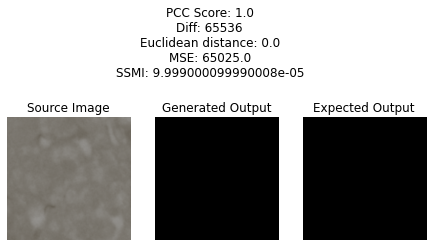

 84%|████████▍ | 130/154 [06:27<01:19,  3.32s/it]

Gen_calc is 65536
True calc is 0
130


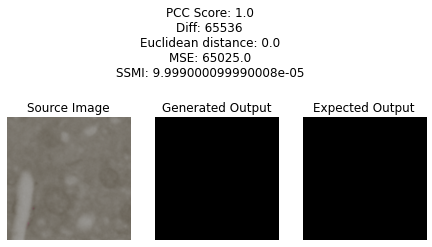

 85%|████████▌ | 131/154 [06:31<01:20,  3.49s/it]

Gen_calc is 114
True calc is 110
131


 86%|████████▌ | 132/154 [06:33<01:07,  3.07s/it]

Gen_calc is 7
True calc is 0
132


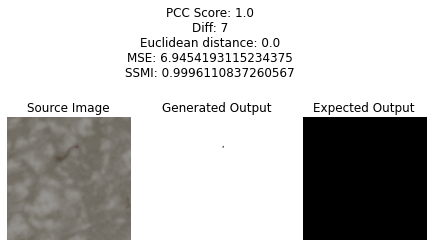

 86%|████████▋ | 133/154 [06:36<01:08,  3.25s/it]

Gen_calc is 65536
True calc is 0
133


 87%|████████▋ | 134/154 [06:40<01:07,  3.36s/it]

Gen_calc is 16
True calc is 43
134


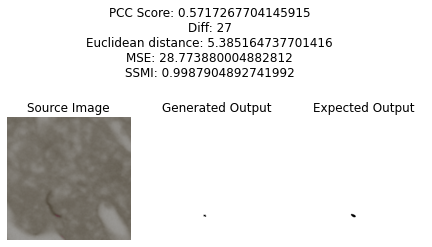

 88%|████████▊ | 135/154 [06:44<01:06,  3.52s/it]

Gen_calc is 14156
True calc is 12877
135


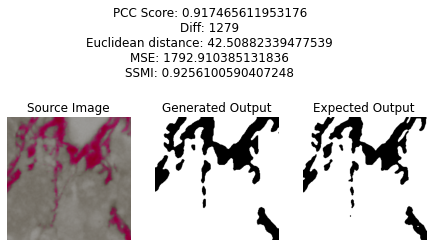

 88%|████████▊ | 136/154 [06:46<00:55,  3.06s/it]

Gen_calc is 65536
True calc is 0
136


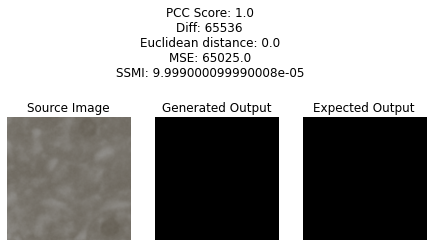

 89%|████████▉ | 137/154 [06:50<00:54,  3.21s/it]

Gen_calc is 65536
True calc is 0
137


 90%|████████▉ | 138/154 [06:53<00:53,  3.33s/it]

Gen_calc is 32
True calc is 84
138


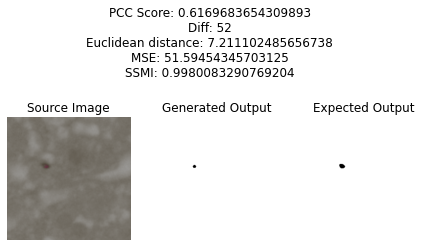

 90%|█████████ | 139/154 [06:55<00:43,  2.93s/it]

Gen_calc is 65536
True calc is 0
139


 91%|█████████ | 140/154 [06:59<00:43,  3.14s/it]

Gen_calc is 66
True calc is 40
140


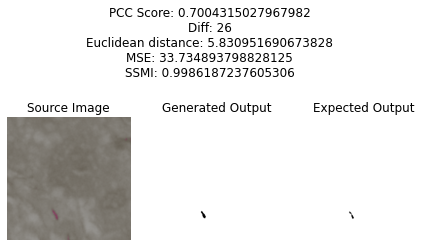

 92%|█████████▏| 141/154 [07:01<00:36,  2.80s/it]

Gen_calc is 65536
True calc is 0
141


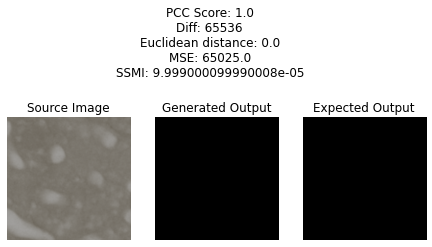

 92%|█████████▏| 142/154 [07:04<00:36,  3.05s/it]

Gen_calc is 65536
True calc is 0
142


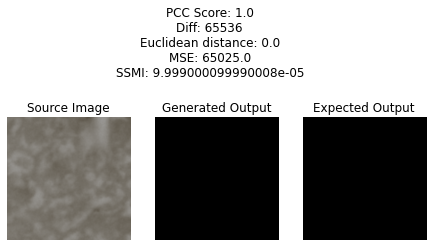

 93%|█████████▎| 143/154 [07:08<00:35,  3.25s/it]

Gen_calc is 65536
True calc is 0
143


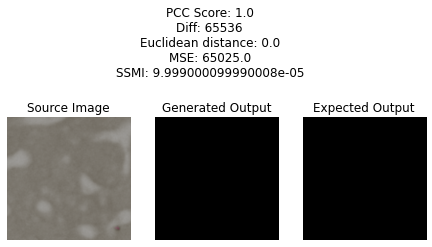

 94%|█████████▎| 144/154 [07:12<00:35,  3.50s/it]

Gen_calc is 65536
True calc is 0
144


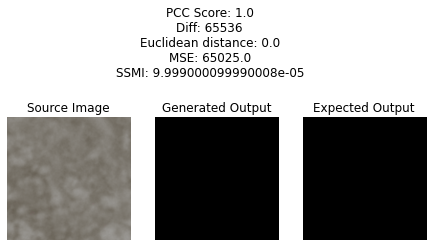

 94%|█████████▍| 145/154 [07:16<00:32,  3.56s/it]

Gen_calc is 65536
True calc is 0
145


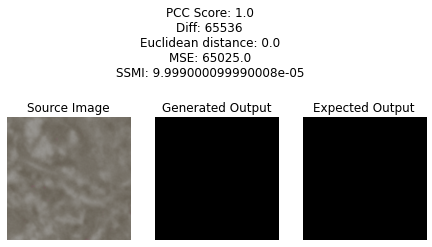

 95%|█████████▍| 146/154 [07:20<00:29,  3.65s/it]

Gen_calc is 23
True calc is 0
146


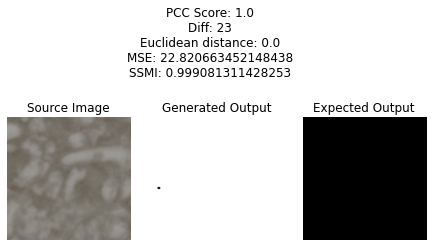

 95%|█████████▌| 147/154 [07:24<00:26,  3.83s/it]

Gen_calc is 5273
True calc is 5281


 96%|█████████▌| 148/154 [07:26<00:19,  3.22s/it]

Gen_calc is 74
True calc is 99
148


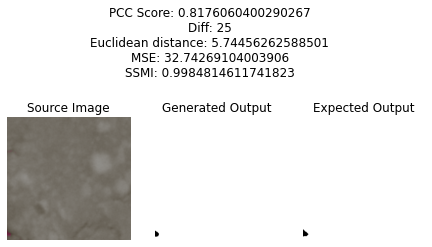

 97%|█████████▋| 149/154 [07:28<00:14,  2.85s/it]

Gen_calc is 304
True calc is 459
149


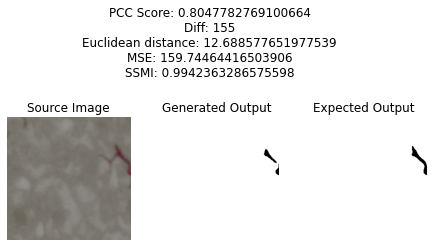

 97%|█████████▋| 150/154 [07:30<00:10,  2.58s/it]

Gen_calc is 37
True calc is 25
150


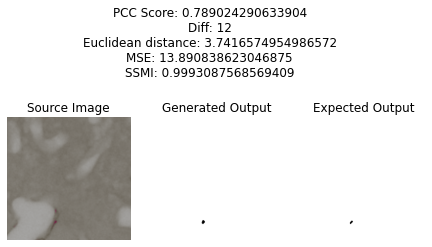

 98%|█████████▊| 151/154 [07:32<00:07,  2.39s/it]

Gen_calc is 55
True calc is 53
151


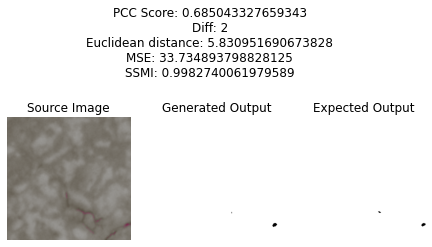

 99%|█████████▊| 152/154 [07:34<00:04,  2.27s/it]

Gen_calc is 65536
True calc is 0
152


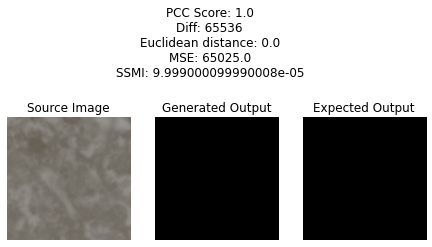

 99%|█████████▉| 153/154 [07:37<00:02,  2.69s/it]

Gen_calc is 65536
True calc is 0
153


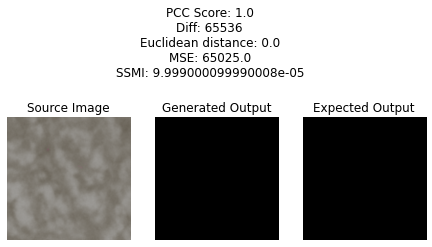

100%|██████████| 154/154 [07:41<00:00,  3.00s/it]

PCC score: 0.89 with standard deviation 0.18.
FQM absolute difference per sample: 35396.86 with standard deviation 32585.53.
FQM balanced difference per sample: 35344.01.
FQM correlation: -0.2445.
Euclidean distance: 6.31, with std 10.53
MSE 35195.43, with std 32252.07
SSMI 0.45, with std 0.49
pix acc mean is  0.4587400362089083
miou is  0.26247008763418006


In [11]:
#%%time
###
### Don't forget to change the test set and the run date
###

model = load_model(model_run, compile=False)
for l in tqdm(range(samples)):

    src_image, tar_image = X1[[l]], X2[[l]]
    invariant_generator = invariant_datagen.flow(
    src_image)
    invariant_generator.next()


    invariant =  invariant_generator[0].copy()

    src_image = invariant  
    
    
    
    
    
    gen_image = model.predict(src_image)
    gen = (gen_image + abs(gen_image.min())) / 2.0
    white, black, thresh1 = threshold_fx.threshold_fx(A1, l, 0)
    if white != 0:
        gen_calc, threshgen = threshold_fx.threshold_gen(gen, white)
        true_calc, threshtar = threshold_fx.threshold_gen(tar_image, white)   
    else:
        gen_calc = 0
        true_calc = 0
        threshgen = np.full((thresh1.shape), 255)
        threshtar = np.full((thresh1.shape), 255)
    if np.mean(threshtar) == 0:
        true_calc = 0
        threshtar = np.full((thresh1.shape), 255)
    
    l1.append(gen_calc)
    l2.append(true_calc)
    print('Gen_calc is', gen_calc)
    print("True calc is", true_calc)
    
    
    src = cv2.cvtColor(src_image.squeeze(), cv2.COLOR_BGR2RGB)

    gen = np.array(threshgen)
    tar = np.array(threshtar)
    
    a = gen
    b = tar

    c = np.array((a-np.min(a))/(np.max(a)-np.min(a)))
    d = np.array((b-np.min(b))/(np.max(b)-np.min(b)))

    m = np.ravel(c)
    n = np.ravel(d)
    
    ms = mse(gen, tar)
    s = measure.compare_ssim(gen, tar, multichannel=True)
    mses.append(ms)
    mmsis.append(s)

    try:
        dst[l][0] = distance.euclidean(m, n)
    except:
        dst[l][0] = 0

    O = gen.ravel()
    G = tar.ravel()


    pcc ,p = pearsonr(O,G)
    if math.isnan(pcc):
        pccscore = 1.0
    else:
        pccscore = pcc
    pcc_sp[l][0] = pccscore

    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(threshgen.flatten().shape[0]):
        gen_pix = threshgen.flatten()[i]
        tar_pix = threshtar.flatten()[i]
        curve_tar.append(tar_pix)
        curve_gen.append(gen_pix)
        if gen_pix == 0:
            if tar_pix == 0:

                tp += 1
            else:

                fp += 1
        elif gen_pix == 255:
            if tar_pix == 255:

                tn += 1
            else:

                fn += 1
    try:
        pix_acc = (tp + tn) / (tp + tn + fp + fn)

        iou = tp / (tp + fp + fn)
        dice = (2 * tp) / ((2 * tp) + fp + fn)
    except:
        pix_acc = 1
        iou = 1
        dice = 1
    pix_acc_list.append(pix_acc)
    iou_list.append(iou)
    dice_list.append(dice)

    num = random.randint(0, 100)
    if num > 0: 
        print(l)
        src = (src + 1) / 2
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (7.5, 5))
        fig.suptitle(f"PCC Score: {pccscore}\nDiff: {abs(gen_calc - true_calc)}\nEuclidean distance: {dst[l][0]}\nMSE: {ms}\nSSMI: {s}")
        ax[0].set_title(f'Source Image')
        ax[0].imshow(src, cmap='gray')
        ax[0].axis('off')
        ax[1].set_title('Generated Output')
        ax[1].imshow(threshgen, cmap='gray')
        ax[1].axis('off')
        ax[2].set_title('Expected Output')
        ax[2].imshow(threshtar, cmap='gray')
        ax[2].axis('off')
        plt.show()

    

avg_dst = np.average(dst, axis = 0)
std_dst = np.std(dst, axis = 0)

avg = np.average(pcc_sp, axis = 0)
std = np.std(pcc_sp, axis = 0)
pcc_score  = str(avg)
pcc_std = str(std)


diff = 0
diffuse = list()
for i in range(samples):
    diffuse.append(abs(l1[i] - l2[i]))
diff = np.sum(diffuse)
mean_errorcalc = np.mean(diffuse)
std_errorcalc = np.std(diffuse)
diffr = 0
for i in range(len(l1)):
    diffr += (l1[i] - l2[i])
correlation, p_value = stats.pearsonr(l1, l2)

pix_acc_mean = statistics.mean(pix_acc_list)
miou = statistics.mean(iou_list)
dice_mean = statistics.mean(dice_list)

print(f"PCC score: {round(float(avg[0]), 2)} with standard deviation {round(float(std[0]), 2)}.")
print(f"FQM absolute difference per sample: {round(diff / samples, 2)} with standard deviation {round(std_errorcalc, 2)}.\nFQM balanced difference per sample: {round(diffr / samples, 2)}.\nFQM correlation: {round(correlation, 4)}.")
print(f"Euclidean distance: {round(float(avg_dst[0]), 2)}, with std {round(float(std_dst[0]), 2)}")
print(f"MSE {round(float(np.mean(mses)), 2)}, with std {round(float(np.std(mses)), 2)}")
print(f"SSMI {round(float(np.mean(mmsis)), 2)}, with std {round(float(np.std(mmsis)), 2)}")
print('pix acc mean is ', pix_acc_mean)
print('miou is ', miou)

In [ ]:
max(diffuse)

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(curve_tar, curve_gen, pos_label=255)
print(f'fpr1 {fpr1}, tpr1 {tpr1} thresh1 {thresh1}')
auc_score1 = roc_auc_score(curve_tar, curve_gen)
print(f'auc_score is {auc_score1}')

In [12]:
import pickle

with open("curve_tar_test.txt", "wb") as fp:   #Pickling
    pickle.dump(curve_tar, fp)

In [13]:
random_probs = [0 for i in range(len(curve_tar))]
p_fpr, p_tpr, _ = roc_curve(curve_tar, random_probs, pos_label=255)

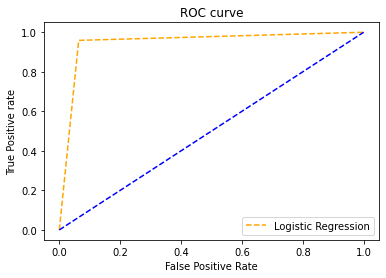

In [14]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

In [15]:
for a,i in enumerate(diffuse):
    print(str(a) + ": " + str(i))

0: 310
1: 167
2: 585
3: 856
4: 1519
5: 1461
6: 88
7: 90
8: 19
9: 0
10: 0
11: 70
12: 954
13: 706
14: 27
15: 2239
16: 0
17: 46
18: 1293
19: 8
20: 3516
21: 2572
22: 321
23: 723
24: 2
25: 1576
26: 321
27: 89
28: 1537
29: 333
30: 2266
31: 1773
32: 16
33: 598
34: 2272
35: 0
36: 244
37: 765
38: 635
39: 49
40: 0
41: 293
42: 0
43: 3
44: 98
45: 36
46: 1124
47: 3482
48: 20
49: 419
50: 10
51: 286
52: 738
53: 423
54: 1886
55: 627
56: 1403
57: 9
58: 246
59: 1711
60: 254
61: 24
62: 120
63: 410
64: 175
65: 890
66: 44
67: 0
68: 8
69: 6
70: 32
71: 11348
72: 0
73: 115
74: 65536
75: 1520
76: 315
77: 1790
78: 905
79: 14
80: 909
81: 189
82: 149
83: 8115
84: 673
85: 781
86: 68
87: 3085
88: 21
89: 3632
90: 466
91: 2167
92: 1377
93: 2879
94: 42
95: 357
96: 14
97: 79
98: 4
99: 1051
100: 1521
101: 37
102: 49
103: 197
104: 279
105: 993
106: 841
107: 348
108: 57
109: 14
110: 2676
111: 89
112: 212
113: 1573
114: 714
115: 6
116: 39
117: 1437
118: 18
119: 3575
120: 2203
121: 0
122: 1052
123: 1532
124: 213
125: 1552
1

In [16]:
top = diffuse.index(max(diffuse))
top

74

In [17]:
max(mses)

65025.0

In [18]:
top = mses.index(max(mses))
top

74

In [19]:
    src_image, tar_image = X1[[top]], X2[[top]]
    invariant_generator = invariant_datagen.flow(
    src_image)
    invariant_generator.next()


    invariant =  invariant_generator[0].copy()

    src_image = invariant  
    
    
    
    
    
    gen_image = model.predict(src_image)
    gen = (gen_image + abs(gen_image.min())) / 2.0
    white, black, thresh1 = threshold_fx.threshold_fx(A1, top, 0)
    if white != 0:
        gen_calc, threshgen = threshold_fx.threshold_gen(gen, white)
        true_calc, threshtar = threshold_fx.threshold_gen(tar_image, white)   
    else:
        gen_calc = 0
        true_calc = 0
        threshgen = np.zeros((thresh1.shape))
        threshtar = np.zeros((thresh1.shape))
    if np.mean(threshtar) == 0:
        true_calc = 0
        threshtar = np.full((thresh1.shape), 255)

In [20]:
gen_calc

65536

In [ ]:
true_calc

In [ ]:
white

In [ ]:
source = src_image.squeeze()
source = (source + 1) / 2.0

In [ ]:
plt.imshow(source, cmap='gray')
plt.show()

In [ ]:
plt.imshow(threshgen, cmap='gray')

In [ ]:
plt.imshow(threshtar, cmap='gray')

In [ ]:
test_df = pd.read_csv('test_evals.csv')
test_df.head()

In [ ]:
data = {'Run_date':  date_of_run,
        'PCC_score': [round(float(avg[0]), 2)],
        'pcc_std': [round(float(std[0]), 2)],
       'fqm_absolute': [round(diff / samples, 2)   ],
       'fqm_std': [round(std_errorcalc, 2)],
       'fqm_balanced': [round(diffr / samples, 2)],
       'fqm_correlation': [round(correlation, 4)],
       'euclidean_dist': [round(float(avg_dst[0]), 2)],
       'euclidean_std': [round(float(std_dst[0]), 2)],
       'mse': [round(float(np.mean(mses)), 2)],
       'mse_std': [round(float(np.std(mses)), 2)],
       'SSIM': [round(float(np.mean(mmsis)), 2)],
              'Pixel acc': [round(float(pix_acc_mean), 4)],
       'SSIM_std': [round(float(np.std(mmsis)), 2)],
                 'IOU': [round(float(miou), 4)],
          'Dice': [round(float(dice_mean), 4)],
       'description': [description
],
       'model_num': model_number}

In [ ]:
df = pd.DataFrame(data)
df['Run_date'] = pd.to_datetime(df['Run_date'])
frames = [test_df, df]
result = pd.concat(frames)
result.tail()

In [ ]:
result.to_csv('test_evals.csv', index=False)

### Figure burn

In [10]:

model = load_model(model_run, compile=False)
